# Part 1

In [552]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [553]:
mnist = keras.datasets.mnist
(trn_I, trn_lbl), (tst_I, tst_lbl) = mnist.load_data()

In [554]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [555]:
trn_I, cv_I, trn_lbl, cv_lbl = train_test_split(trn_I, trn_lbl, test_size=0.2, random_state=42)

In [556]:
cv_I.shape

(12000, 28, 28)

In [557]:
trn_I.shape

(48000, 28, 28)

In [558]:
tst_I.shape

(10000, 28, 28)

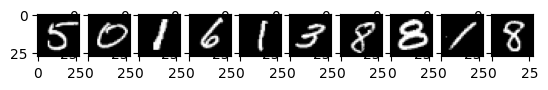

[5 0 1 6 1 3 8 8 1 8]


In [559]:
fig, axes = plt.subplots(nrows=1, ncols=10,)
for i in range(10):
    axes[i].imshow(trn_I[i], cmap='gray')
plt.show()
print(trn_lbl[0:10])

In [560]:
trn_I = trn_I / 255.0

tst_I = tst_I / 255.0

In [561]:
model = keras.Sequential([                                               #144-->64
    keras.layers.Flatten(input_shape=(28, 28)),
                                                                         # 144 better
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(144, activation = 'relu'),     # 512 --> 128
                                                      # 144
    # keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

 Obs:

  1. --> relu >> Sigmoid/tanh
  2. --> softmax >> Sigmoid
  3. --> 2 choices
    1. 784 --> 512 --> 256 --> 10, accuracy:97.81, time: 19*10 sec
    2. 784 --> 128 --> 10, accuracy: 97.58, time: 8*10 sec
  4. --> 10 epochs
  5. --> adam, cross entropy,

  $Note$: going with 144 to have better visual representation


512 -> 216 10 epochs 97.97 acc 19*10 sec


144 10 epochs  97.80 acc 8*10 sec  (CHOSEN)

In [562]:
# ta = []
# for n in {32, 64, 100, 144, 256, 512, 784, 1568}:
#   model = keras.Sequential([                                               #144-->64
#       keras.layers.Flatten(input_shape=(28, 28)),
#                                                                           # 144 better
#       # keras.layers.Dense(512, activation='relu'),
#       keras.layers.Dense(n, activation = 'relu'),     # 512 --> 128
#                                                         # 144
#       # keras.layers.Dense(64, activation = 'relu'),
#       keras.layers.Dense(10, activation='softmax')
#   ])
#   model.compile(optimizer='adam',
#                 loss='sparse_categorical_crossentropy',
#                 metrics = 'accuracy')
#   model.fit(trn_I, trn_lbl, epochs=1, validation_data=(cv_I, cv_lbl))  # valid set
#   test_loss, test_acc = model.evaluate(tst_I,  tst_lbl)
#   ta.append(test_acc)
#   print('Test accuracy:', test_acc)

# plt.plot([32, 64, 100, 144, 256, 512, 784, 1568], ta)

In [563]:
# plt.scatter([32, 64, 100, 144, 256, 512, 784, 1568], ta)

In [564]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [565]:
model.fit(trn_I, trn_lbl, epochs=10, validation_data=(cv_I, cv_lbl))

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2845 - accuracy: 0.9187 - val_loss: 21.5726 - val_accuracy: 0.9506
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1262 - accuracy: 0.9635 - val_loss: 16.8147 - val_accuracy: 0.9642
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0848 - accuracy: 0.9752 - val_loss: 15.8490 - val_accuracy: 0.9690
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 14.3323 - val_accuracy: 0.9729
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 14.1063 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 15.8530 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 17.8603 - val_ac

In [566]:
test_loss, test_acc = model.evaluate(tst_I,  tst_lbl)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9768
Test accuracy: 0.9768000245094299


In [567]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 144)               113040    
                                                                 
 dense_14 (Dense)            (None, 10)                1450      
                                                                 
Total params: 114490 (447.23 KB)
Trainable params: 114490 (447.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [568]:
pred_lbl = model.predict(tst_I)

313/313 [==============================] - 0s 1ms/step


In [569]:
pred_lbl.shape

(10000, 10)

In [570]:
pred_lbl = np.argmax(pred_lbl, axis=1)
pred_lbl.shape

(10000,)

In [571]:
wts1 = model.layers[1].get_weights()[0]

In [572]:
wts1.shape

(784, 144)

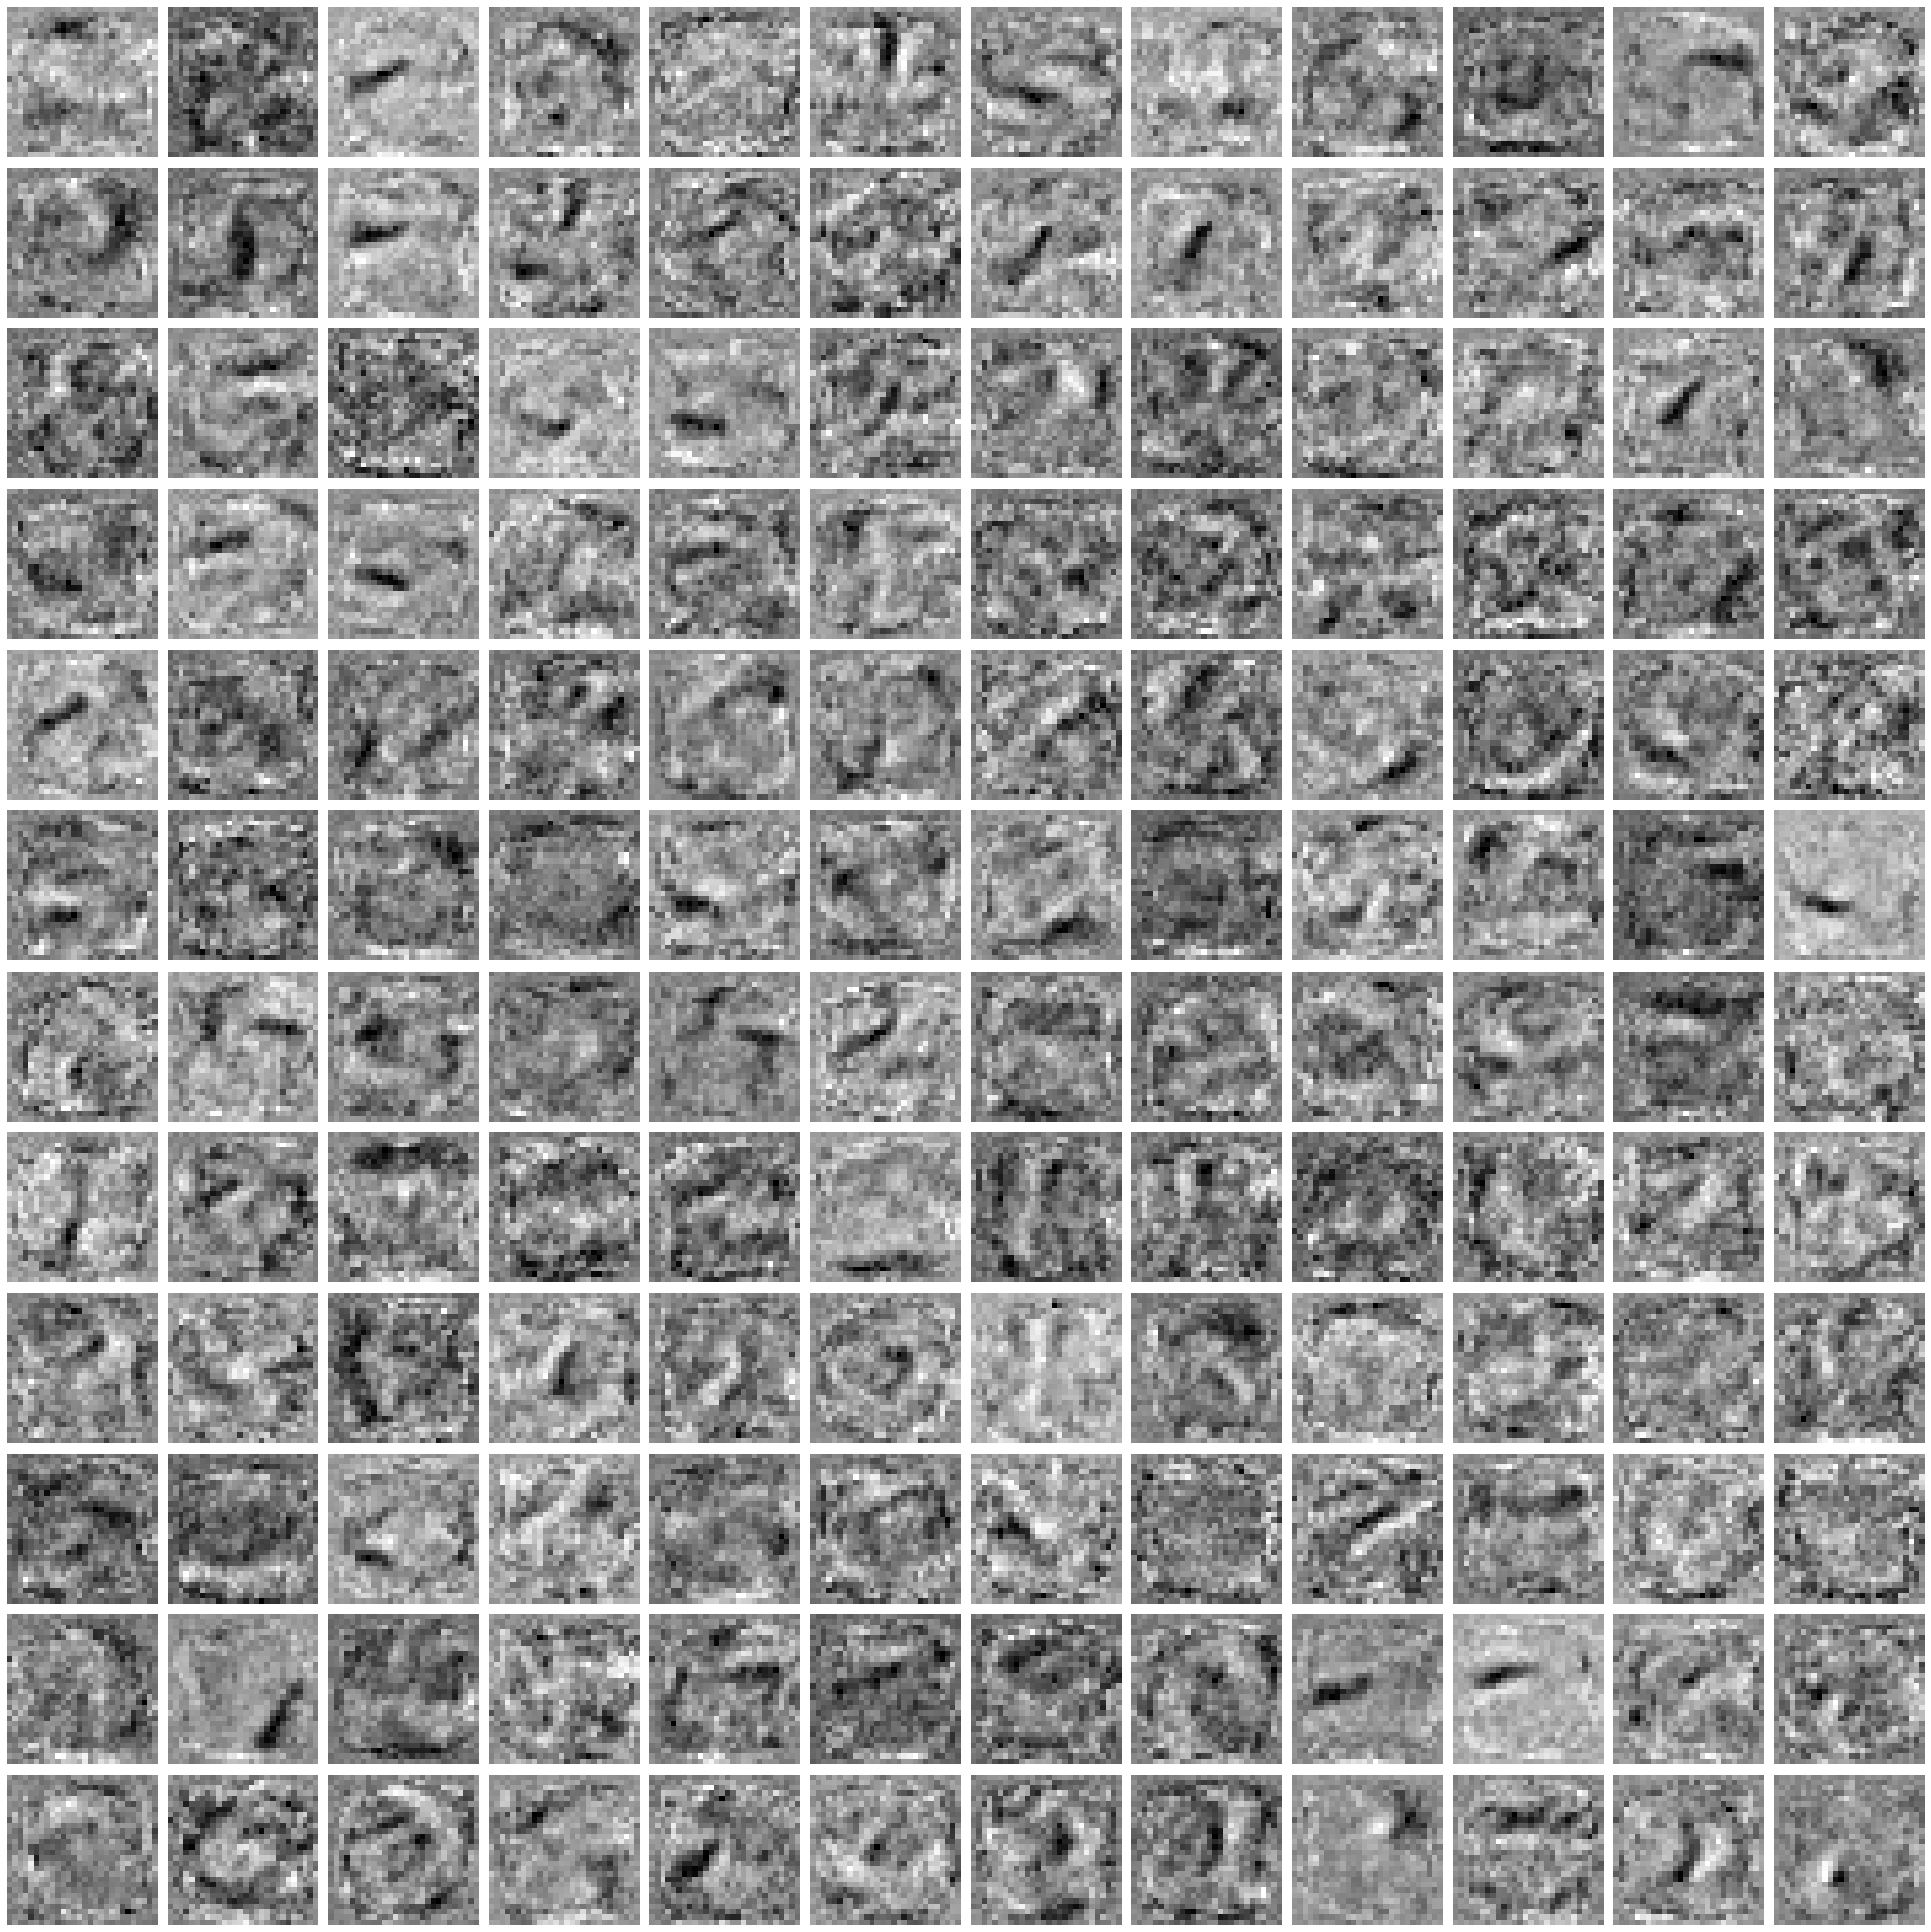

In [573]:

fig, axs = plt.subplots(12, 12, figsize=(28 , 28))

for i in range(12):
    for j in range(12):
      node = wts1[:, i*12 + j]
      node = node.reshape((28, 28))
      axs[i, j].imshow(node, cmap='gray')
      axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [574]:
wts2 = model.layers[2].get_weights()[0]

In [575]:
wts2.shape

(144, 10)

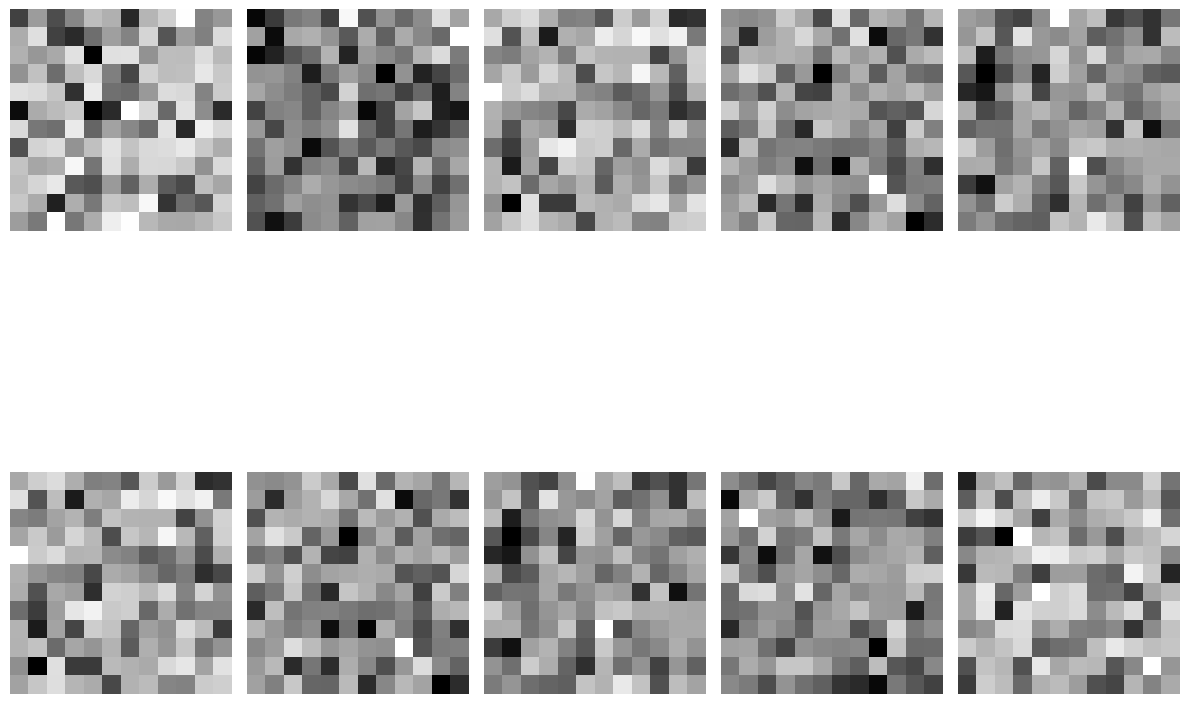

In [576]:
fig, axs = plt.subplots(2, 5, figsize=(12 , 12))

for i in range(2):
  for j in range(5):
    node = wts2[:, i*2 + j]
    node = node.reshape((12, 12))
    axs[i, j].imshow(node, cmap='gray')
    axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [577]:
wts1.shape

(784, 144)

In [578]:
wts1x2 = np.matmul(wts1, wts2)

In [579]:
wts1x2.shape

(784, 10)

img = (784,1)

w1 = (784,144)

w2 = (144,10)

**softmax(relu(img.w1).w2)**






what are we doing here

**relu(w1.w2)**

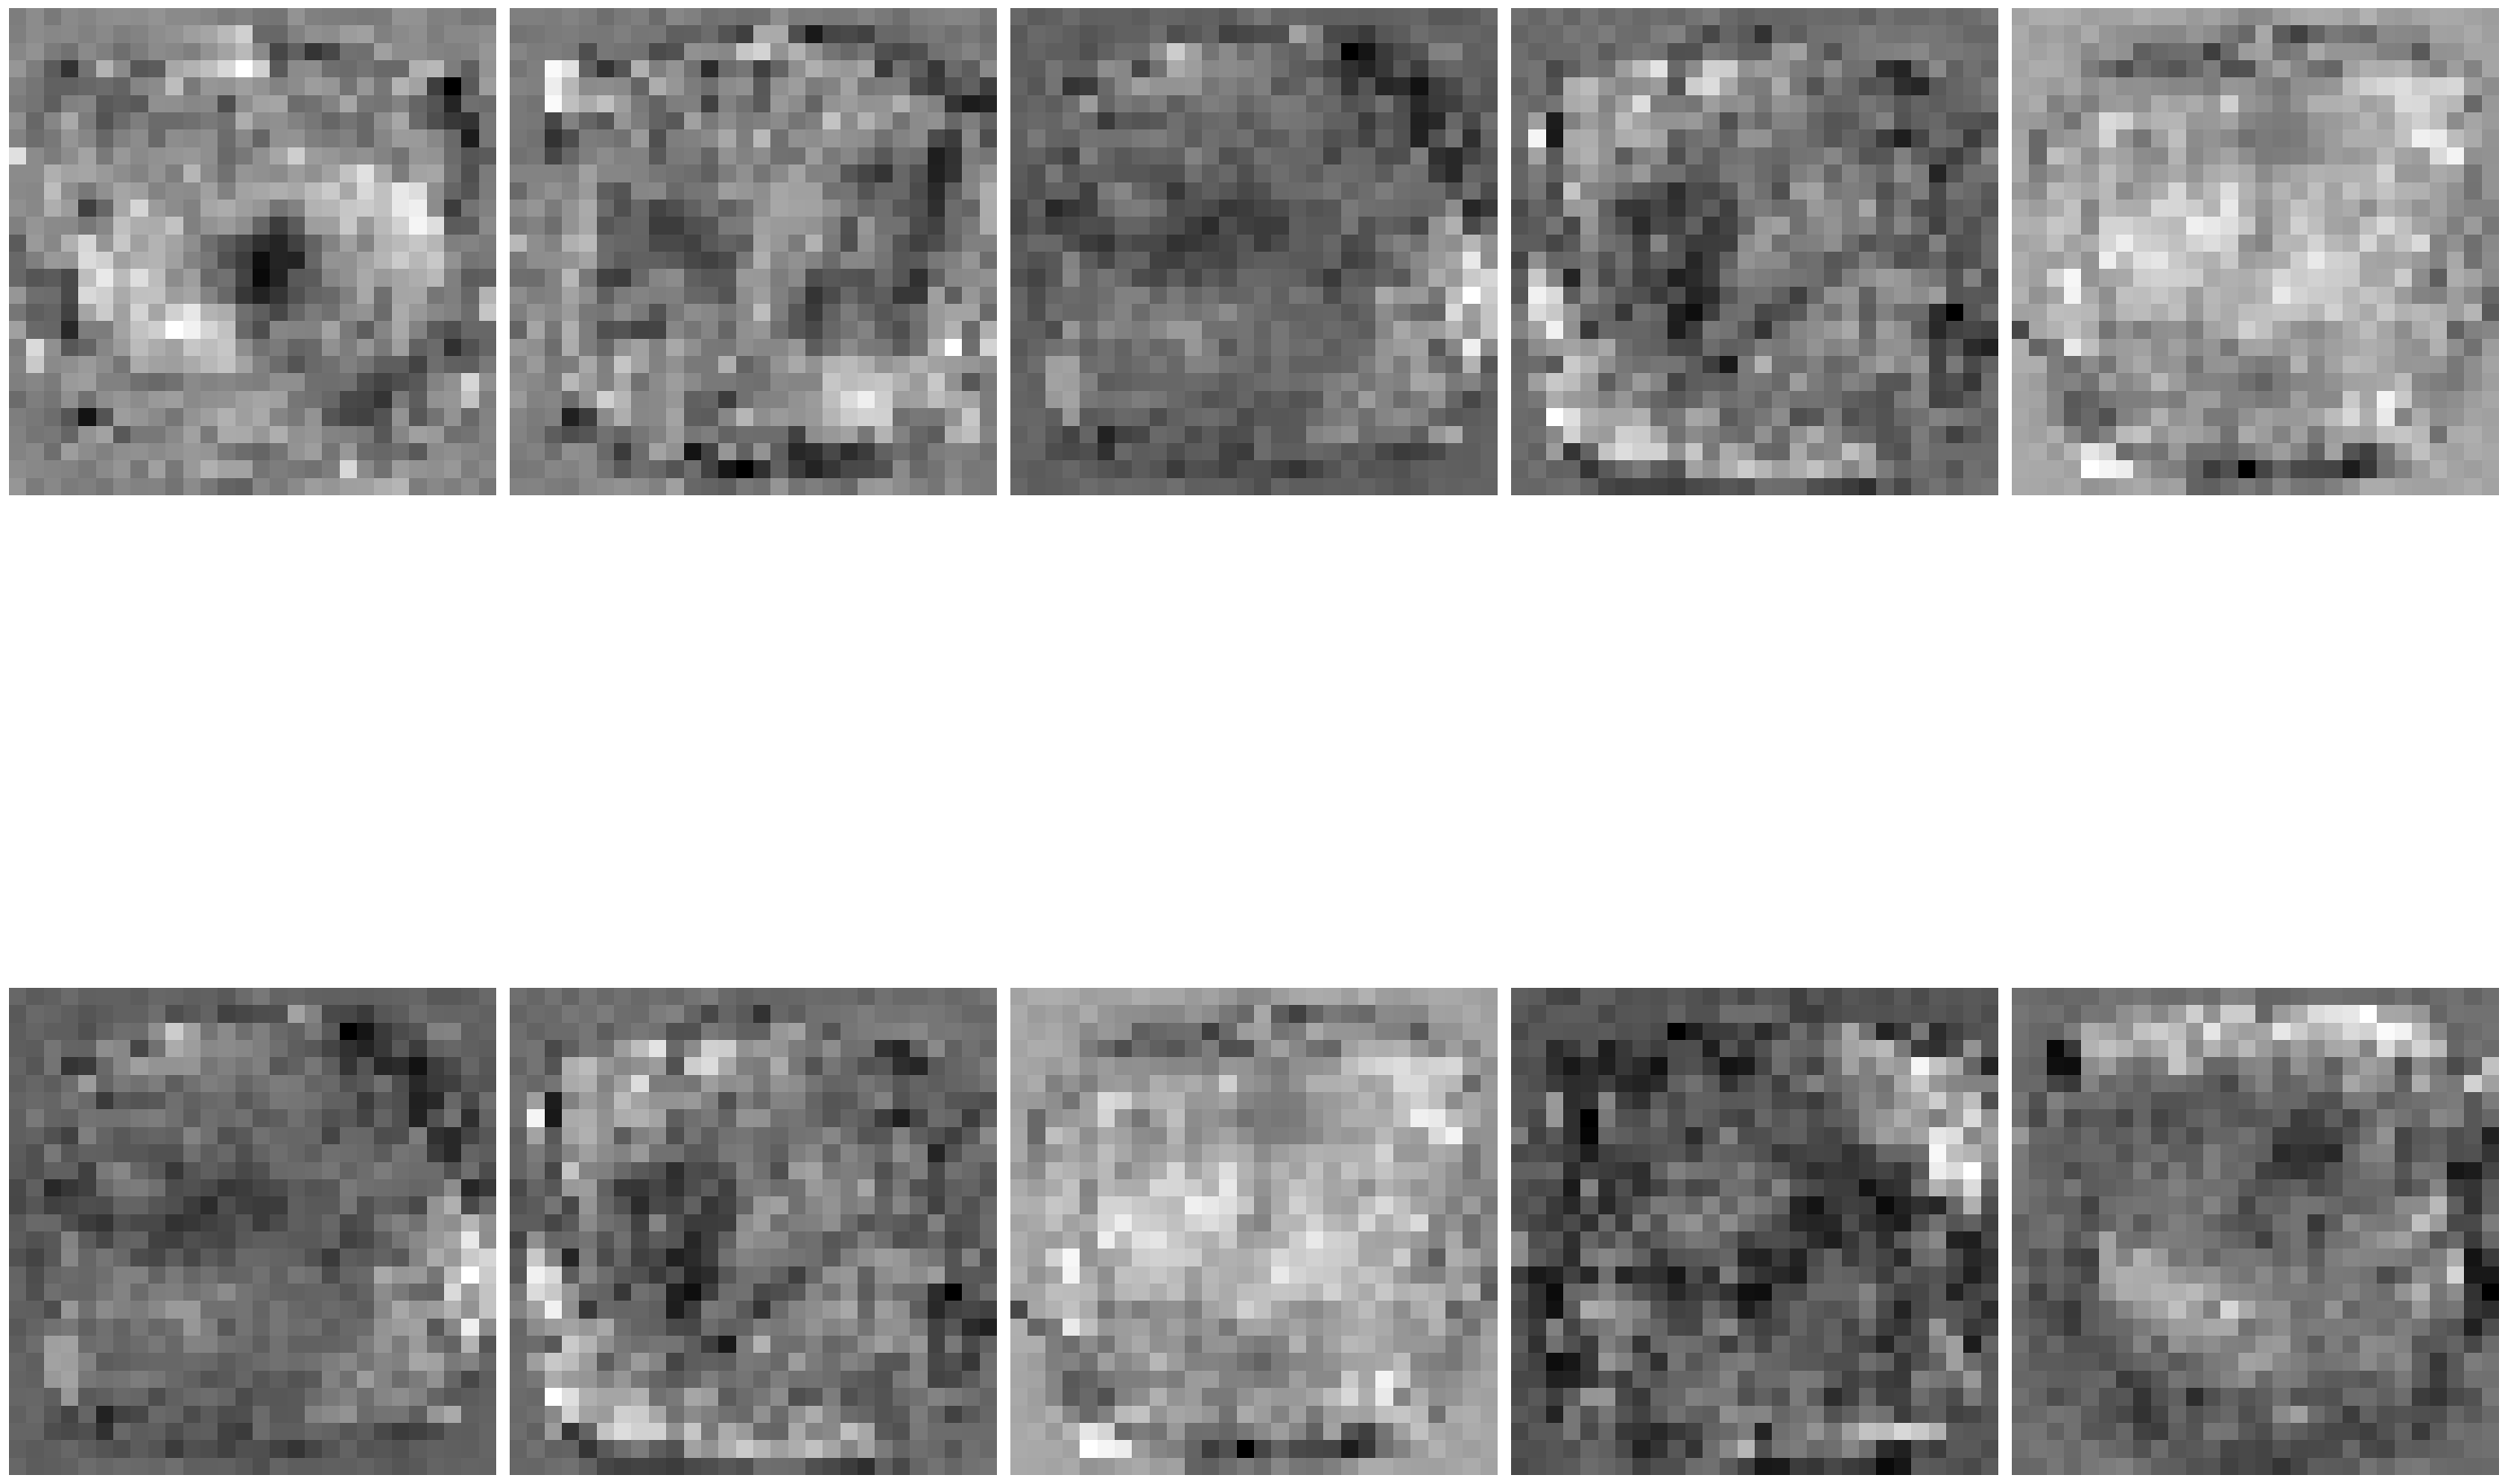

In [580]:
fig, axs = plt.subplots(2, 5, figsize=(28,28))

for i in range(2):
  for j in range(5):
    node = wts1x2[:, i*2 + j]
    node = node.reshape((28,28))
    axs[i, j].imshow(node, cmap='gray')
    axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [581]:
zz = np.maximum(wts1x2,0)

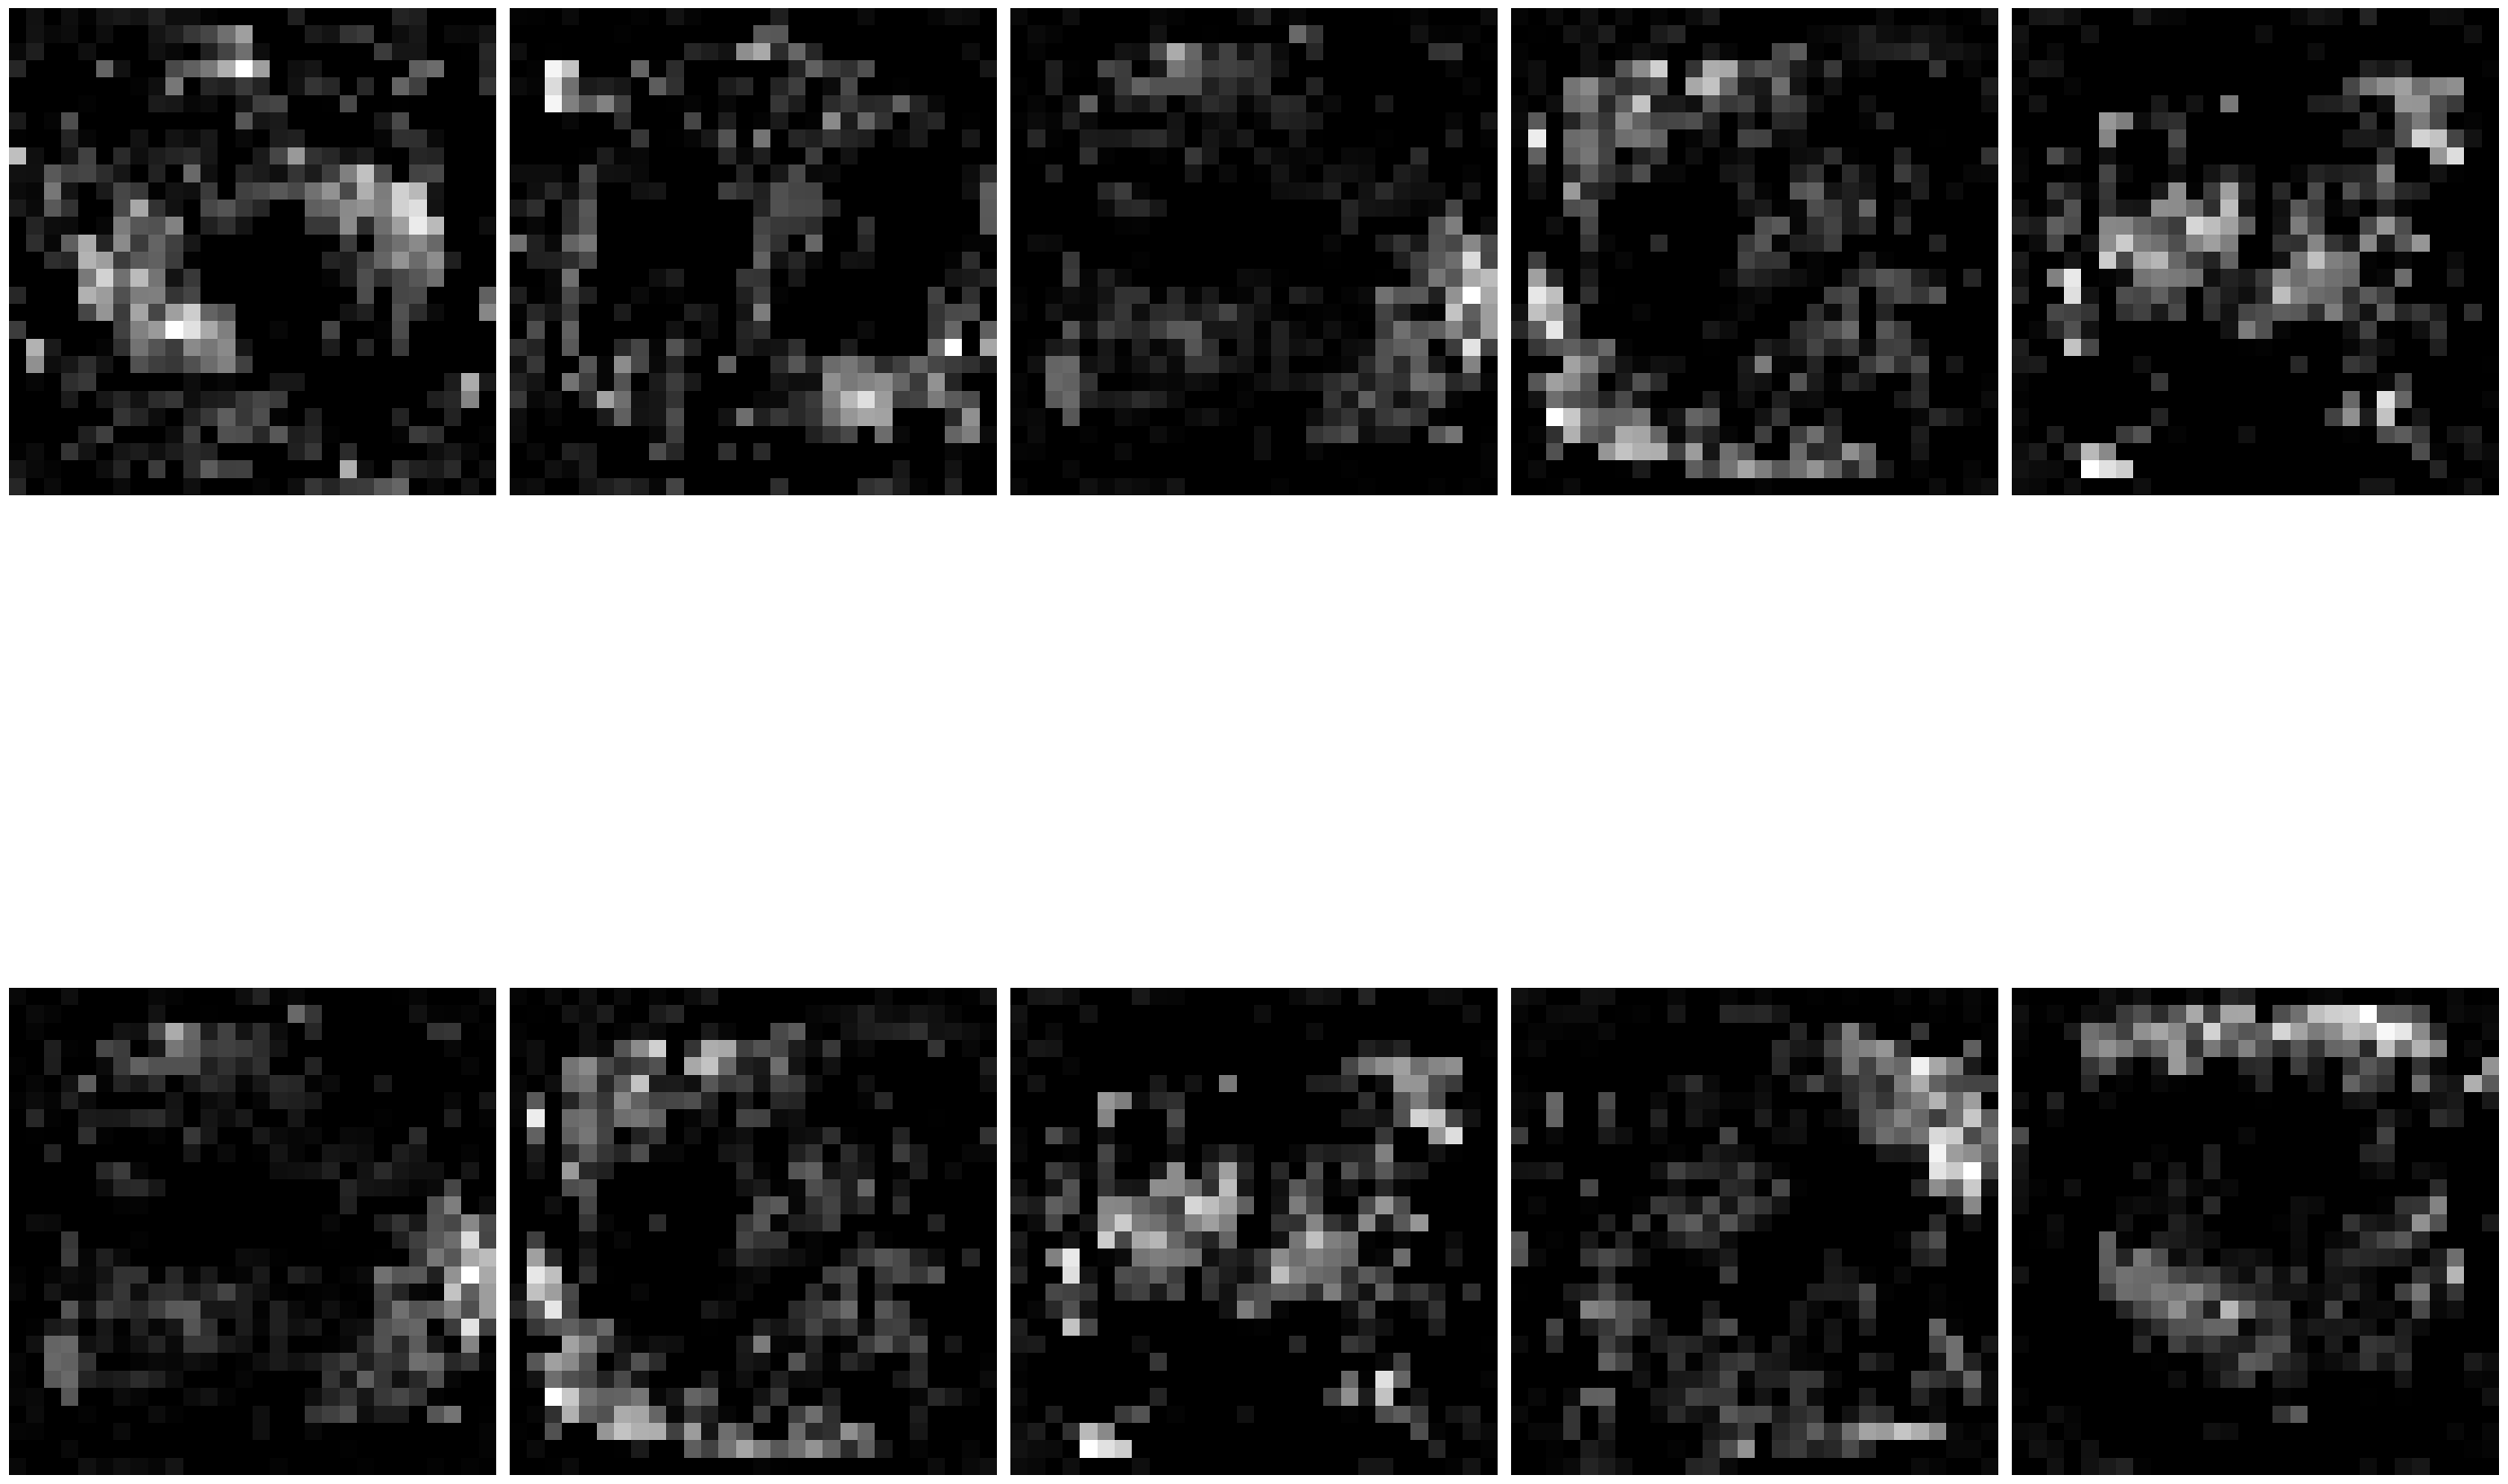

In [582]:
fig, axs = plt.subplots(2, 5, figsize=(28,28))

for i in range(2):
  for j in range(5):
    node = zz[:, i*2 + j]
    node = node.reshape((28,28))
    axs[i, j].imshow(node, cmap='gray')
    axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [583]:
tst_I[0].shape

(28, 28)

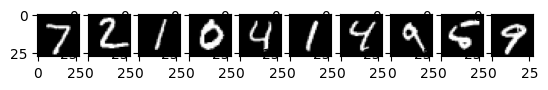

[7 2 1 0 4 1 4 9 5 9]


In [584]:
fig, axes = plt.subplots(nrows=1, ncols=10,)
for i in range(10):
    axes[i].imshow(tst_I[i], cmap='gray')
plt.show()
print(pred_lbl[0:10])

In [585]:
pred_lbl = np.reshape(pred_lbl, (pred_lbl.shape[0], 1))
tst_lbl = np.reshape(tst_lbl, (tst_lbl.shape[0], 1))

In [586]:
(tst_lbl == pred_lbl).sum()

9768

In [587]:
num_false = np.count_nonzero(~(tst_lbl == pred_lbl))
num_false

232

In [588]:
mscl_lbl = pred_lbl[~(tst_lbl == pred_lbl)]

In [589]:
real_mscl_lbl = tst_lbl[~(tst_lbl == pred_lbl)]

In [590]:
mscl_I = tst_I[~(tst_lbl == pred_lbl).flatten()]

In [591]:
mscl_I.shape

(232, 28, 28)

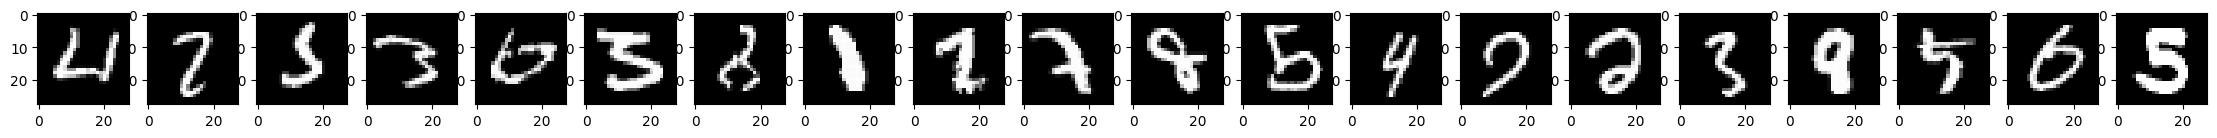

[0 7 3 7 0 5 2 8 1 2 4 8 9 9 0 8 9 4 0 3]
[4 2 5 3 6 3 8 1 2 7 8 5 4 7 2 3 8 5 6 5]


In [592]:
fig, axes = plt.subplots(nrows=1, ncols=20,figsize=(28 , 28))
for i in range(20):
    axes[i].imshow(mscl_I[i], cmap='gray')
plt.show()
print(mscl_lbl[0:20])
print(real_mscl_lbl[0:20])

In [593]:
mscl_idx = np.where(~(tst_lbl == pred_lbl))

In [594]:
mscl_idx

(array([  33,  321,  340,  381,  445,  449,  582,  619,  659,  684,  691,
         720,  760,  846,  939,  944,  947,  951,  965, 1003, 1014, 1039,
        1112, 1114, 1156, 1182, 1192, 1226, 1232, 1242, 1247, 1260, 1299,
        1319, 1328, 1364, 1393, 1395, 1494, 1500, 1522, 1530, 1549, 1553,
        1609, 1655, 1681, 1709, 1717, 1790, 1828, 1878, 1880, 1901, 1941,
        1955, 1981, 1982, 1984, 2004, 2016, 2053, 2093, 2098, 2109, 2118,
        2135, 2174, 2182, 2185, 2189, 2272, 2292, 2293, 2325, 2339, 2387,
        2414, 2454, 2462, 2488, 2534, 2597, 2607, 2654, 2720, 2721, 2743,
        2863, 2877, 2896, 2921, 2927, 2930, 2939, 2953, 2979, 2995, 3005,
        3073, 3117, 3225, 3369, 3422, 3503, 3520, 3550, 3558, 3559, 3597,
        3629, 3727, 3749, 3751, 3757, 3780, 3808, 3838, 3853, 3902, 3906,
        3941, 3943, 3976, 3985, 4027, 4065, 4078, 4176, 4193, 4199, 4224,
        4248, 4289, 4294, 4360, 4425, 4443, 4449, 4497, 4500, 4504, 4534,
        4536, 4547, 4571, 4601, 4690, 

In [595]:
# weights_third_layer = model.layers[3].get_weights()[0]  # Get weights of the first hidden layer

In [596]:
# weights_second_layer.shape

In [597]:
# fig, axs = plt.subplots(2, 5, figsize=(12 , 12))

# for i in range(2):
#   for j in range(5):
#     weights_node = weights_third_layer[:, i*2 + j]
#     weights_node = weights_node.reshape((8, 8))
#     axs[i, j].imshow(weights_node, cmap='gray')
#     axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()

In [598]:
# weights_third_layer = model.layers[3].get_weights()[0]  # Get weights of the first hidden layer

In [599]:
# trying to find wts1 . img

In [600]:
I_idx = 9

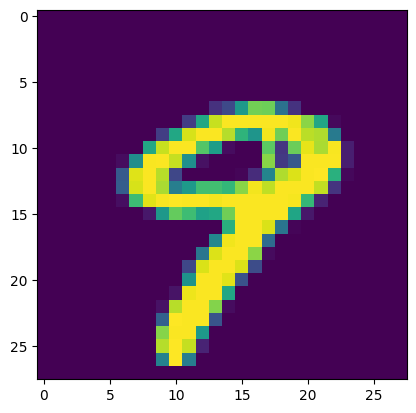

In [601]:
plt.imshow(tst_I[I_idx])
plt.show()

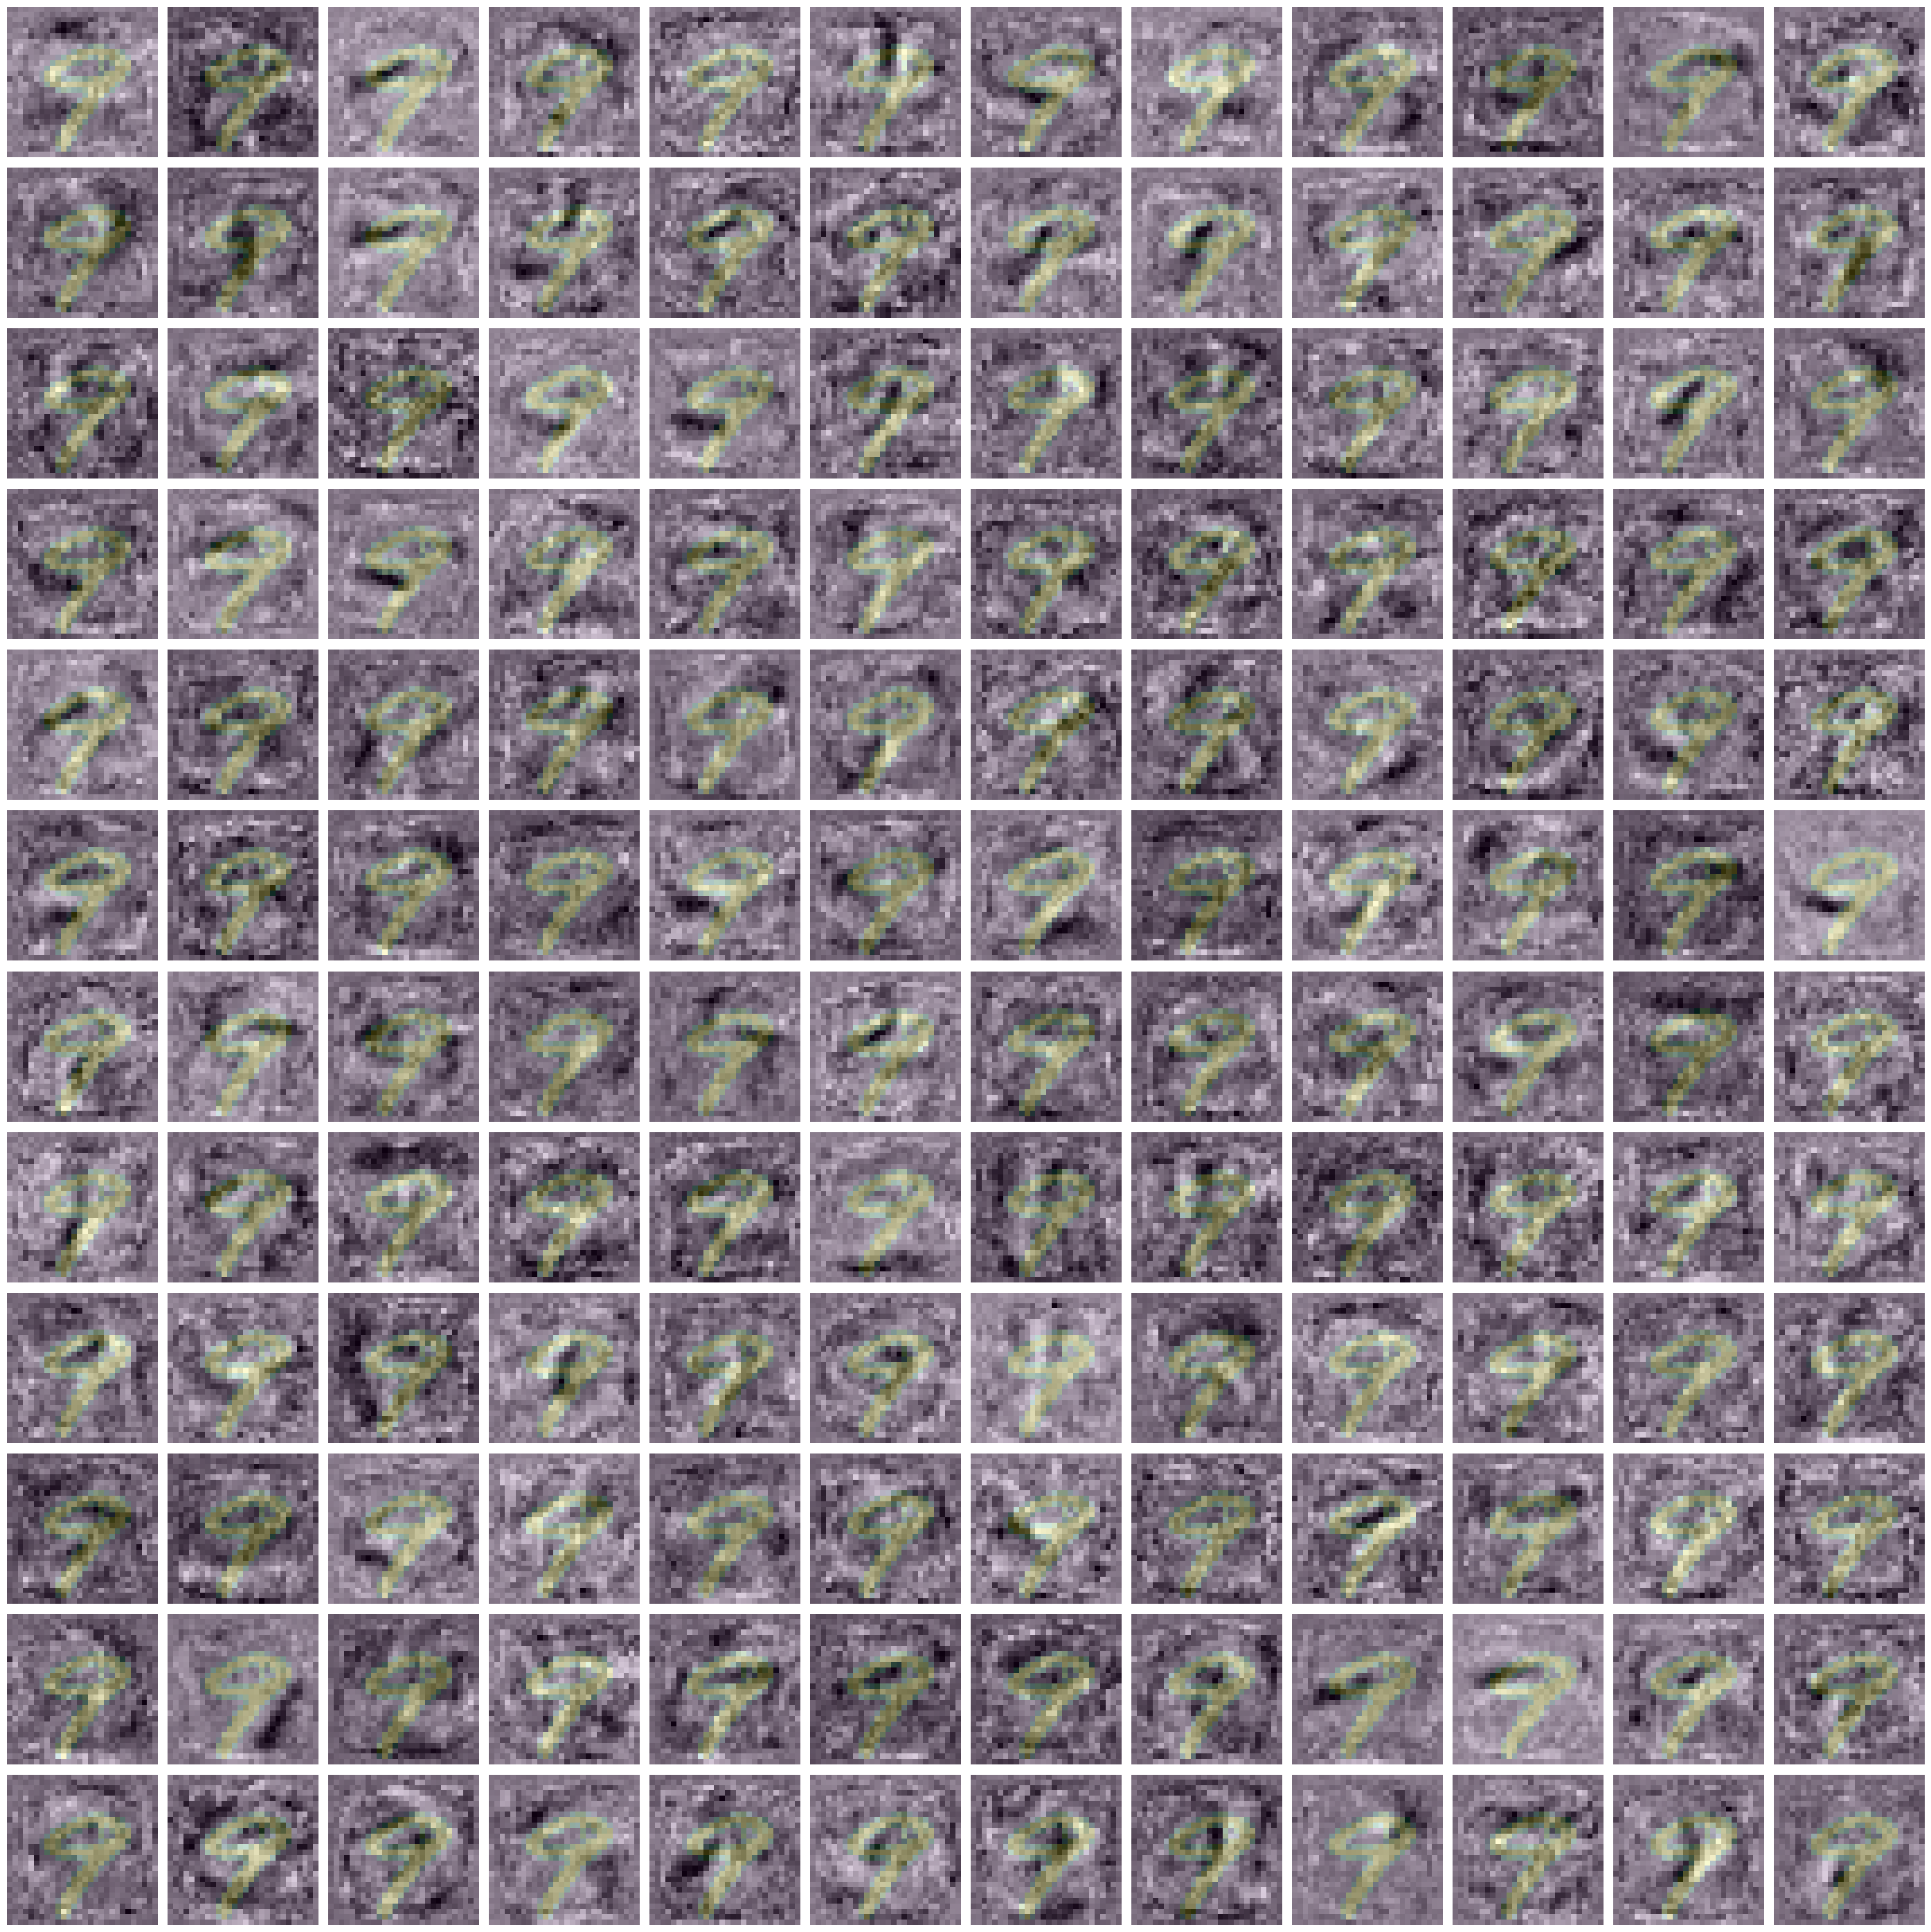

In [602]:
fig, axs = plt.subplots(12, 12, figsize=(28 , 28))

for i in range(12):
    for j in range(12):
      node = wts1[:, i*12 + j]
      node = node.reshape((28, 28))
      axs[i, j].imshow(node, cmap='gray')
      axs[i,j].imshow(tst_I[I_idx],  alpha = 0.2)
      axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [603]:
tst_lbl[I_idx]

array([9], dtype=uint8)

In [604]:
print(tst_I[I_idx].shape, wts1.shape)

(28, 28) (784, 144)


In [605]:
flt = np.reshape(tst_I[I_idx], (784,1))   #flt img 9


wts1 . img9

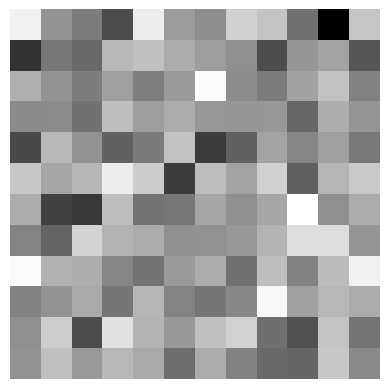

In [606]:
temp = np.matmul(wts1.T, flt)
temp = np.reshape(temp, (12, 12))
plt.imshow(temp, cmap = 'gray')
plt.axis("off")
plt.show()

relu (wts1 . img)

In [607]:
temp = np.maximum(temp, 0)

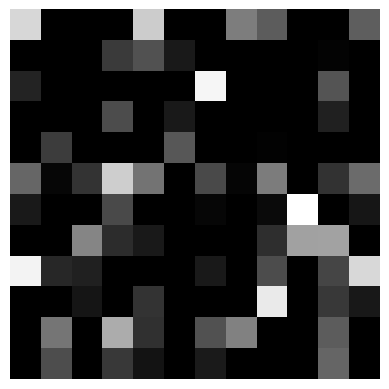

In [608]:
plt.imshow(temp, cmap = 'gray')
plt.axis("off")
plt.show()

In [609]:
wts2.shape

(144, 10)

In [610]:
temp = temp.reshape(144, 1)

In [611]:
temp2 = np.matmul(wts2.T, temp)

In [612]:
temp2.shape

(10, 1)

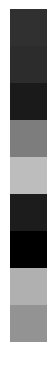

In [613]:
plt.imshow(temp2, cmap = 'gray')

plt.axis("off")
plt.show()

In [614]:
temp2

array([[-14.0798532 ],
       [-14.65402529],
       [-17.11161729],
       [ -3.61877438],
       [  5.06733649],
       [-16.8676684 ],
       [-20.71764984],
       [  3.3342569 ],
       [ -0.61100198],
       [ 14.13082697]])

## for misclassified

In [615]:
I_idx = 247

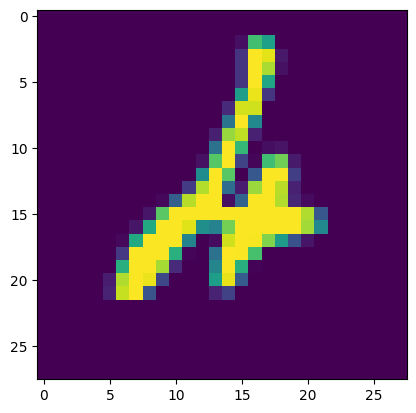

In [616]:
plt.imshow(tst_I[I_idx])
plt.show()

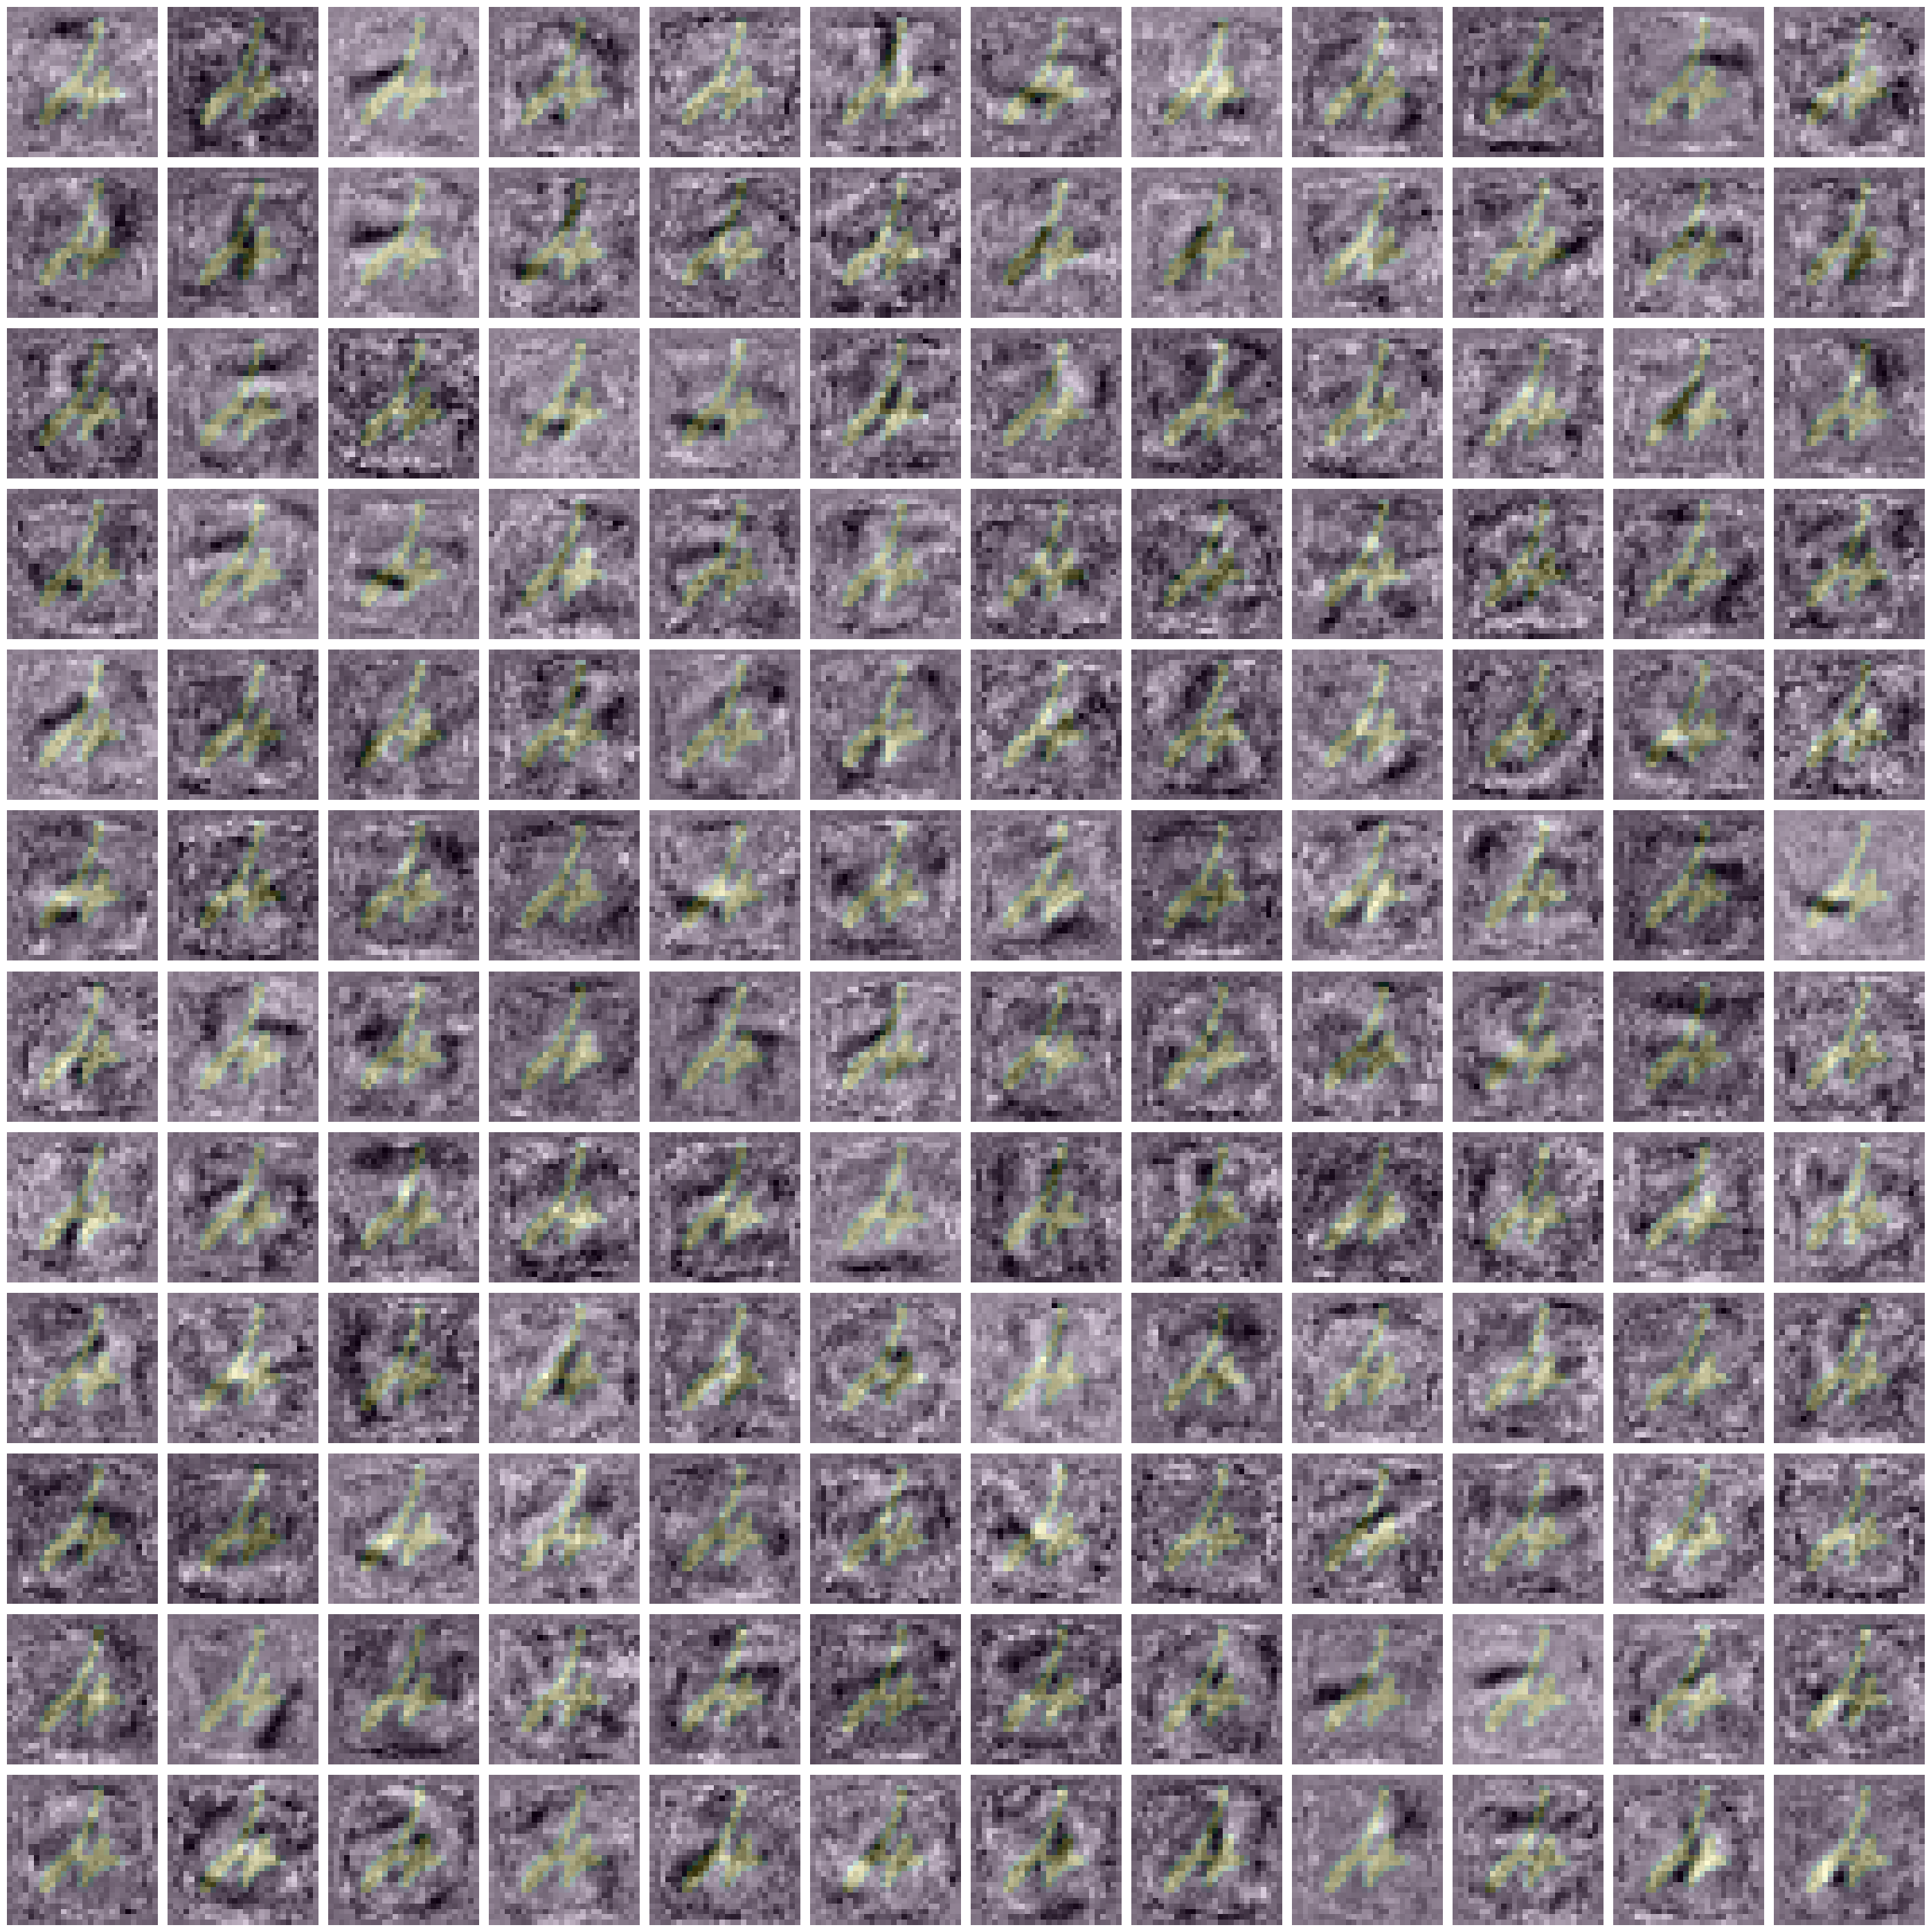

In [617]:
fig, axs = plt.subplots(12, 12, figsize=(28 , 28))

for i in range(12):
    for j in range(12):
      node = wts1[:, i*12 + j]
      node = node.reshape((28, 28))
      axs[i, j].imshow(node, cmap='gray')
      axs[i,j].imshow(tst_I[I_idx],  alpha = 0.2)
      axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [618]:
tst_lbl[I_idx]

array([4], dtype=uint8)

In [619]:
print(tst_I[I_idx].shape, wts1.shape)

(28, 28) (784, 144)


In [620]:
flt = np.reshape(tst_I[I_idx], (784,1))   #flt img 9


wts1 . img9

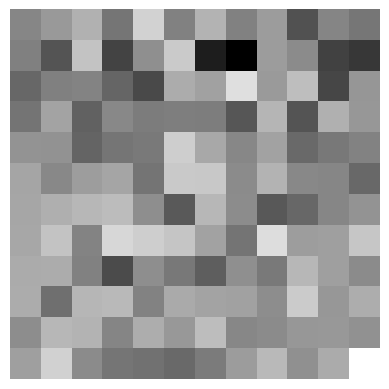

In [621]:
temp = np.matmul(wts1.T, flt)
temp = np.reshape(temp, (12, 12))
plt.imshow(temp, cmap = 'gray')
plt.axis("off")
plt.show()

relu (wts1 . img)

In [622]:
temp = np.maximum(temp, 0)

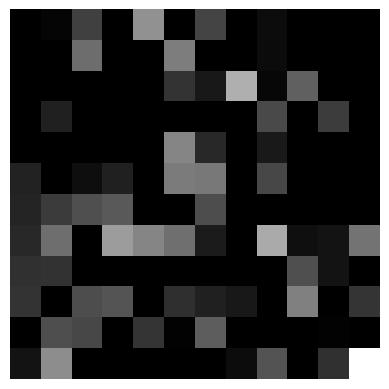

In [623]:
plt.imshow(temp, cmap = 'gray')
plt.axis("off")
plt.show()

In [624]:
wts2.shape

(144, 10)

In [625]:
temp = temp.reshape(144, 1)

In [626]:
temp2 = np.matmul(wts2.T, temp)

In [627]:
temp2.shape

(10, 1)

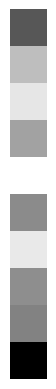

In [628]:
plt.imshow(temp2, cmap = 'gray')

plt.axis("off")
plt.show()

In [629]:
temp2

array([[-13.93601215],
       [ -2.55594885],
       [  1.88580014],
       [ -5.67309869],
       [  4.66151938],
       [ -8.12563337],
       [  2.15512648],
       [ -7.80523067],
       [ -9.22279332],
       [-23.55543792]])

In [630]:
# fig, axs = plt.subplots(12, 12, figsize=(28 , 28))

# for i in range(12):
#     for j in range(12):
#       node = wts1[:, i*12 + j]
#       node = node.reshape((28, 28))
#       axs[i, j].imshow(node, cmap='gray')
#       axs[i,j].imshow(tst_I[I_idx],  alpha = 0.2)
#       axs[i,j].imshow(np.full((28,28), temp[i,j]), alpha = 0.2)
#       axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()

In [631]:
# not doing it for  hidden --> out layer coz not intuitive

In [632]:
tst_lbl.shape

(10000, 1)

In [633]:
Img4 = tst_I[np.all(tst_lbl == 4, axis=1)]

In [634]:
Img4.shape

(982, 28, 28)

In [635]:
mean4 = Img4.mean(axis=0)
mean4.shape

(28, 28)

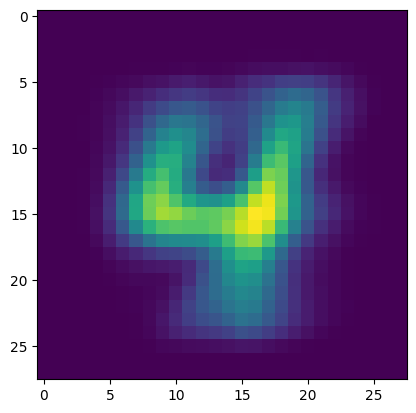

In [636]:
plt.imshow(mean4)

In [637]:
mscl4 = tst_I[np.where((tst_lbl == 4) & (pred_lbl != 4))[0]]

In [638]:
mscl4.shape

(18, 28, 28)

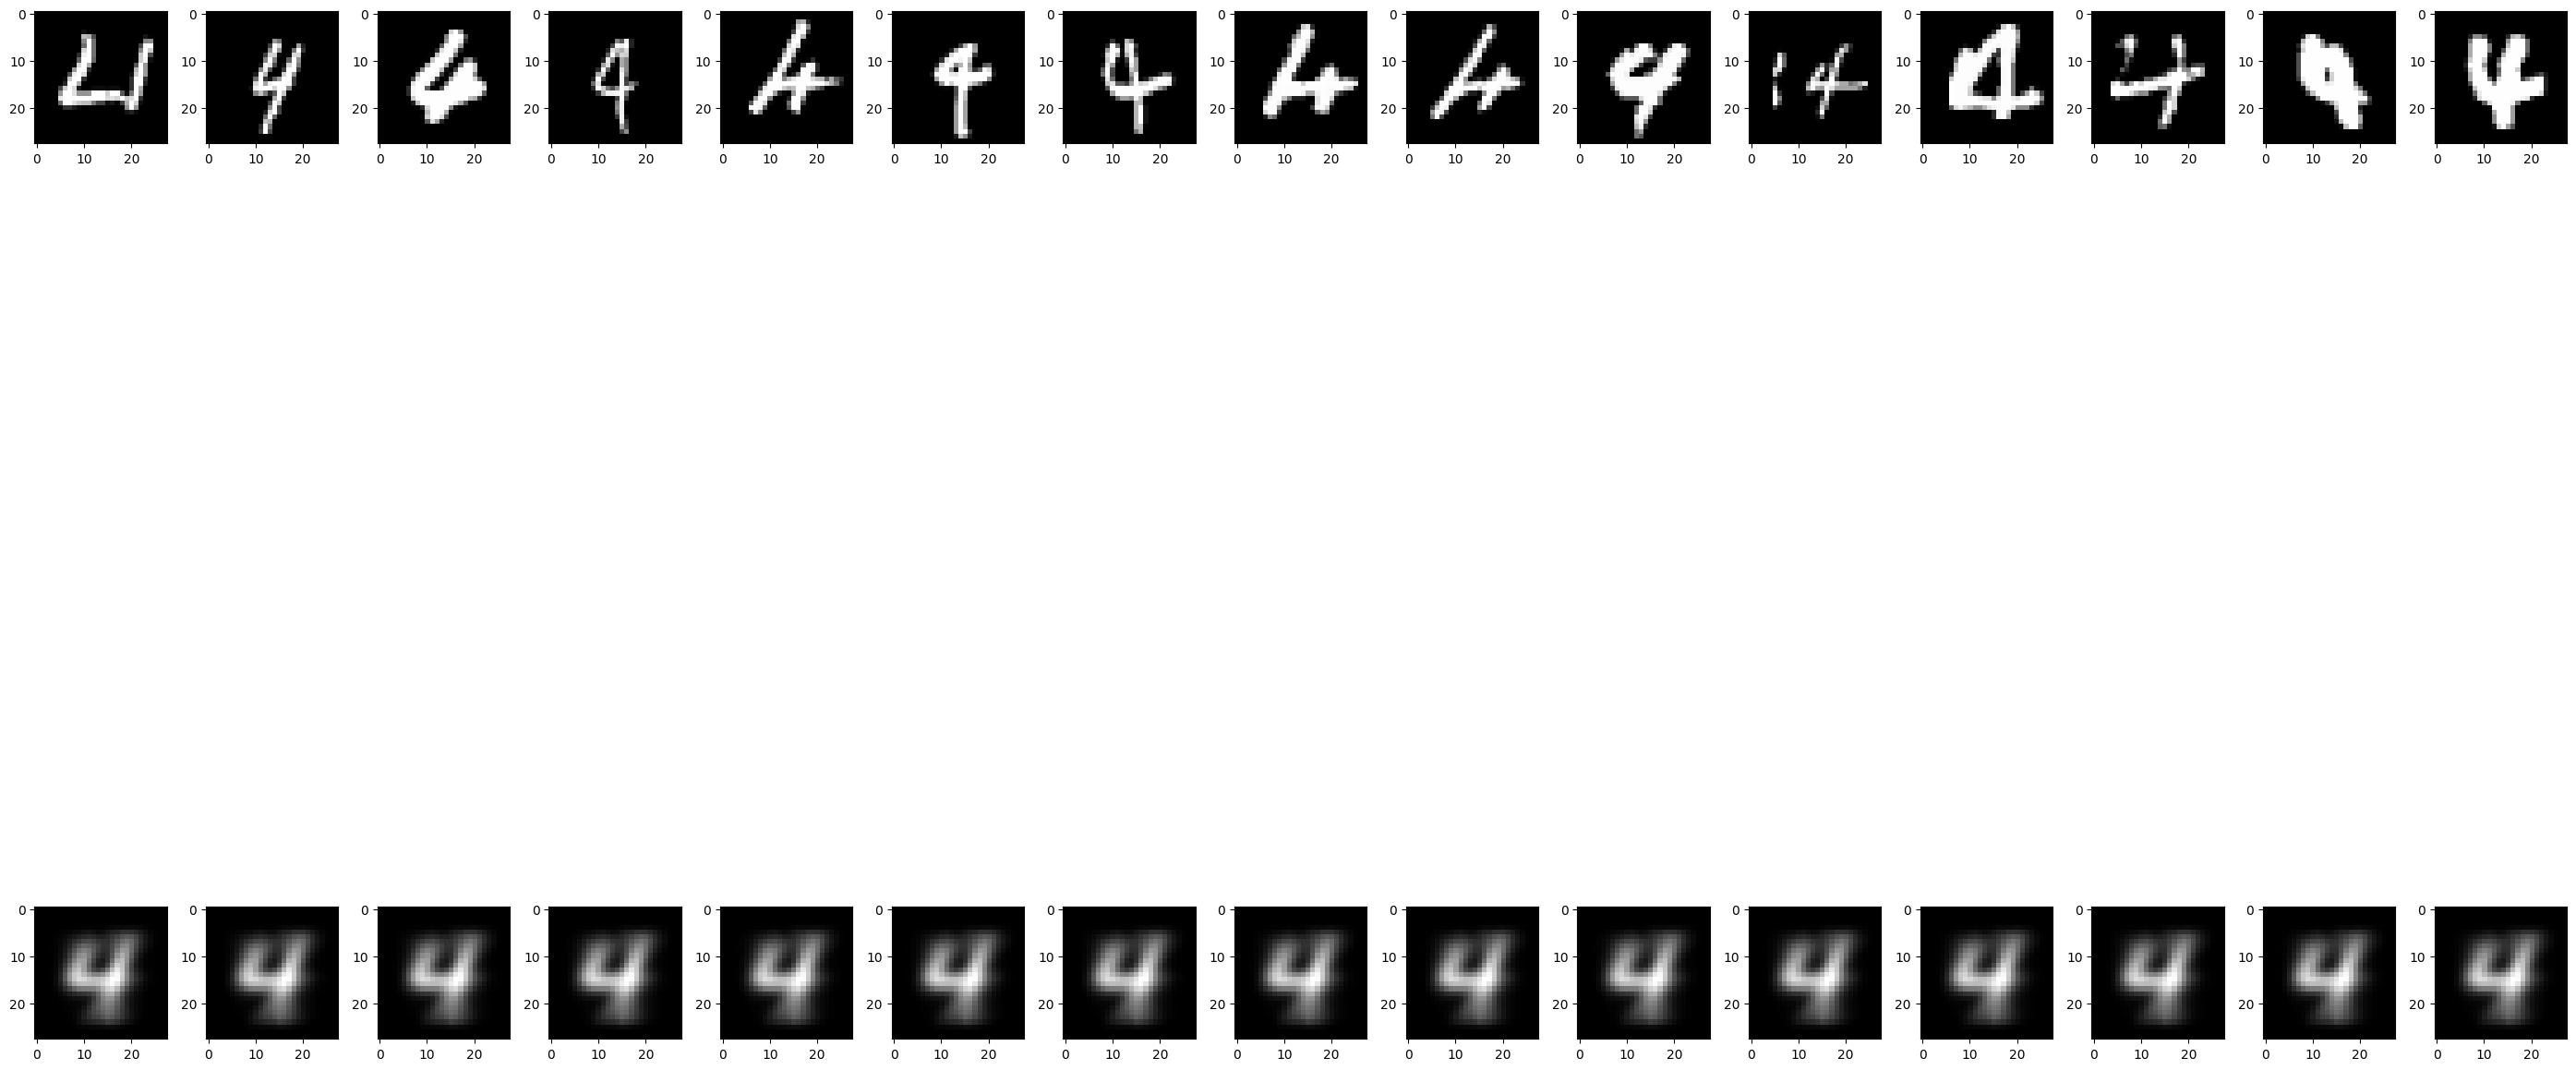

In [639]:
fig, axes = plt.subplots(nrows=2, ncols=15,figsize=(28 , 28))
for i in range(15):
    axes[0, i].imshow(mscl4[i], cmap='gray')
    axes[1, i].imshow(mean4, cmap='gray')
plt.tight_layout(h_pad = 0.05)
plt.show()

##reasons for misclassification
* brush stroke width
* angle orientation
* writing style
* extra on screen

**can give more weightage to misclassified example**

In [640]:
def newloss(y_true, y_pred):

    y_true = tf.cast(y_true, tf.int32)
    print(y_true.shape)

    y_pred = tf.cast(y_pred, tf.float32)
    print(y_pred.shape)

    argmax_pred = tf.cast(tf.argmax(y_pred, axis=1), tf.int32)
    print(argmax_pred.shape)

    print((tf.not_equal(y_true, argmax_pred)).shape)  #(T if miscl, F is correct)

    weights = (tf.cast(tf.not_equal(y_true, argmax_pred), tf.float32))*5.0 + 1.0   # missclassifed - wt 6, class - wt 1

    print(weights.shape)
    print(weights)

    loss = keras.losses.sparse_categorical_crossentropy(y_true, y_pred)    # now wtd loss find

    print(loss.shape)

    weighted_loss = tf.reduce_mean(weights * loss)  # mean loss
    print(weighted_loss.shape)

    return weighted_loss

In [641]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(144, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [642]:
model2.compile(optimizer='adam',
               loss= newloss,
               metrics=['accuracy'])


In [643]:
model2.fit(trn_I, trn_lbl, epochs=10, validation_data=(cv_I, cv_lbl))

Epoch 1/10
(32, 1)
(32, 10)
(32,)
(32, 32)
(32, 32)
Tensor("newloss/add:0", shape=(32, 32), dtype=float32)
(32,)
()
(32, 1)
(32, 10)
(32,)
(32, 32)
(32, 32)
Tensor("newloss/add:0", shape=(32, 32), dtype=float32)
(32,)
()
1496/1500 [============================>.] - ETA: 0s - loss: 1.5350 - accuracy: 0.9206(32, 1)
(32, 10)
(32,)
(32, 32)
(32, 32)
Tensor("newloss/add:0", shape=(32, 32), dtype=float32)
(32,)
()
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5328 - accuracy: 0.9208 - val_loss: 124.4835 - val_accuracy: 0.9513
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6934 - accuracy: 0.9626 - val_loss: 86.8922 - val_accuracy: 0.9646
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4710 - accuracy: 0.9741 - val_loss: 80.2491 - val_accuracy: 0.9711
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3476 - accuracy: 0.9809 - val_loss: 83.1496 - val_accuracy: 0.9712
Epoch 5/10
1500/15

In [644]:
test_loss, test_acc = model2.evaluate(tst_I, tst_lbl)
print('Test accuracy:', test_acc)

(None, 1)
(None, 10)
(None,)
(None, None)
(None, None)
Tensor("newloss/add:0", shape=(None, None), dtype=float32)
(None,)
()
313/313 [==============================] - 1s 2ms/step - loss: 0.4886 - accuracy: 0.9745
Test accuracy: 0.9745000004768372


In [645]:
pred_lbl2 = model2.predict(tst_I)

313/313 [==============================] - 0s 1ms/step


In [646]:
pred_lbl2 = np.argmax(pred_lbl2, axis=1)
pred_lbl2.shape

(10000,)

In [647]:
pred_lbl2 = np.reshape(pred_lbl2, (pred_lbl2.shape[0], 1))
tst_lbl = np.reshape(tst_lbl, (tst_lbl.shape[0], 1))

In [648]:
(tst_lbl == pred_lbl2).sum()

9745

In [649]:
num_false = np.count_nonzero(~(tst_lbl == pred_lbl2))
num_false

255

In [650]:
mscl_lbl2 = pred_lbl2[~(tst_lbl == pred_lbl2)]

In [651]:
real_mscl_lbl2 = tst_lbl[~(tst_lbl == pred_lbl2)]

In [652]:
mscl_I2 = tst_I[~(tst_lbl == pred_lbl2).flatten()]

In [653]:
mscl_I2.shape

(255, 28, 28)

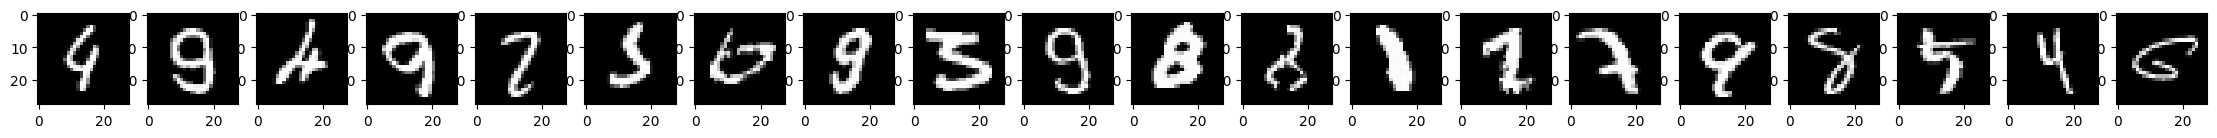

[9 5 6 3 7 3 0 8 5 5 0 2 8 1 3 8 7 4 9 5]
[4 9 4 9 2 5 6 9 3 9 8 8 1 2 7 9 8 5 4 6]


In [654]:
fig, axes = plt.subplots(nrows=1, ncols=20,figsize=(28 , 28))
for i in range(20):
    axes[i].imshow(mscl_I2[i], cmap='gray')
plt.show()
print(mscl_lbl2[0:20])
print(real_mscl_lbl2[0:20])

In [655]:
mscl_idx2 = np.where(~(tst_lbl == pred_lbl))

In [656]:
mscl_idx2

(array([  33,  321,  340,  381,  445,  449,  582,  619,  659,  684,  691,
         720,  760,  846,  939,  944,  947,  951,  965, 1003, 1014, 1039,
        1112, 1114, 1156, 1182, 1192, 1226, 1232, 1242, 1247, 1260, 1299,
        1319, 1328, 1364, 1393, 1395, 1494, 1500, 1522, 1530, 1549, 1553,
        1609, 1655, 1681, 1709, 1717, 1790, 1828, 1878, 1880, 1901, 1941,
        1955, 1981, 1982, 1984, 2004, 2016, 2053, 2093, 2098, 2109, 2118,
        2135, 2174, 2182, 2185, 2189, 2272, 2292, 2293, 2325, 2339, 2387,
        2414, 2454, 2462, 2488, 2534, 2597, 2607, 2654, 2720, 2721, 2743,
        2863, 2877, 2896, 2921, 2927, 2930, 2939, 2953, 2979, 2995, 3005,
        3073, 3117, 3225, 3369, 3422, 3503, 3520, 3550, 3558, 3559, 3597,
        3629, 3727, 3749, 3751, 3757, 3780, 3808, 3838, 3853, 3902, 3906,
        3941, 3943, 3976, 3985, 4027, 4065, 4078, 4176, 4193, 4199, 4224,
        4248, 4289, 4294, 4360, 4425, 4443, 4449, 4497, 4500, 4504, 4534,
        4536, 4547, 4571, 4601, 4690, 

In [657]:
common = np.intersect1d(mscl_idx, mscl_idx2)

In [658]:
common.shape

(233,)

In [659]:
# doesnt make much difference, only makes it worse

In [660]:
# mscl4 = np.reshape(mscl4, (mscl4.shape[1], 28,28))

In [661]:
tst_I.shape

(10000, 28, 28)

# Part 2

In [662]:
mean_I = np.zeros((10, 28, 28))
for i in range(10):
  Img = tst_I[np.all(tst_lbl == i, axis=1)]
  mean = Img.mean(axis=0)
  mean_I[i,:,:] = mean

mean_I.shape

(10, 28, 28)

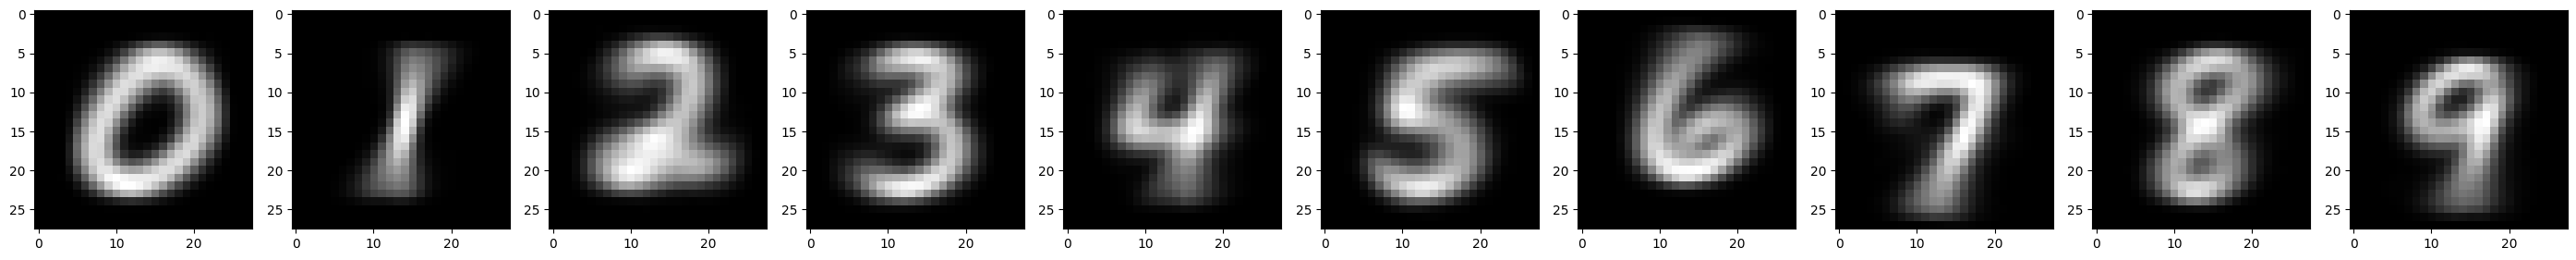

In [663]:
fig, axes = plt.subplots(nrows=1, ncols=10,figsize=(28 , 28))
for i in range(10):
    axes[i].imshow(mean_I[i], cmap='gray')
    # axes[1, i].imshow(mean4, cmap='gray')
plt.tight_layout()
plt.show()

In [664]:
# 20 weights

In [665]:
# for i in range(len(mean_I)):
#   m = np.min(mean_I[i])
#   M = np.max(mean_I[i])

#   mean_I[i] = 2 * ((mean_I[i] - m) / (M - m)) - 1


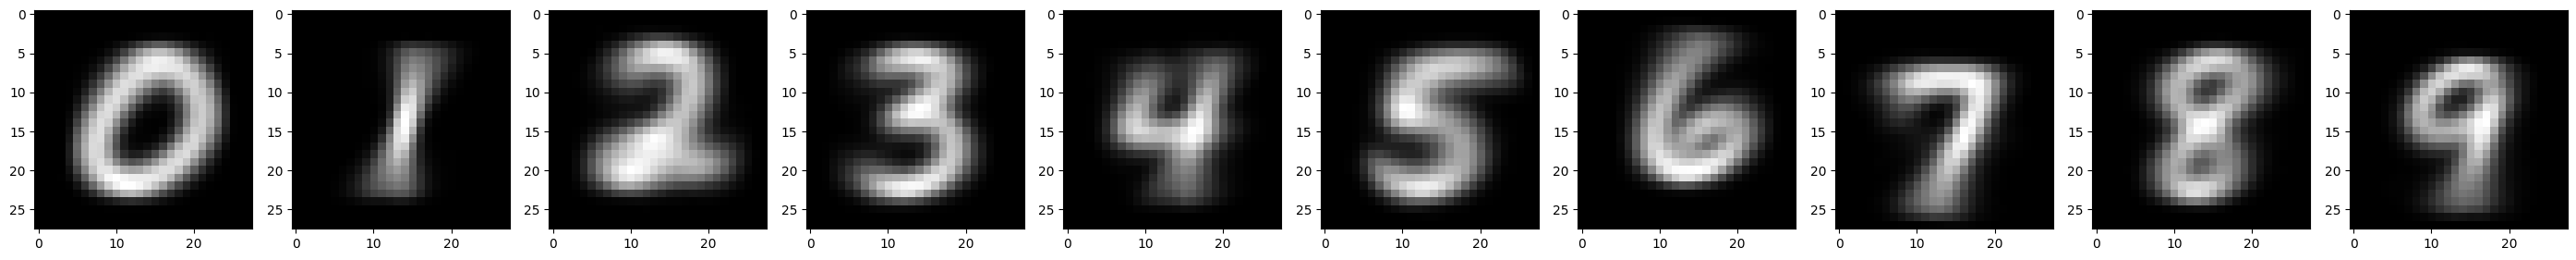

In [666]:
fig, axes = plt.subplots(nrows=1, ncols=10,figsize=(28 , 28))
for i in range(10):
    axes[i].imshow(mean_I[i], cmap='gray')
    # axes[1, i].imshow(mean4, cmap='gray')
plt.tight_layout()
plt.show()

In [667]:
# from PIL import Image
# plt.figure(figsize = (28,3))
# plt.imshow(Image.open("/content/0to9png.png"))
# plt.axis("off")

In [668]:
weights = np.full((10, 4, 28, 28), 0.0)

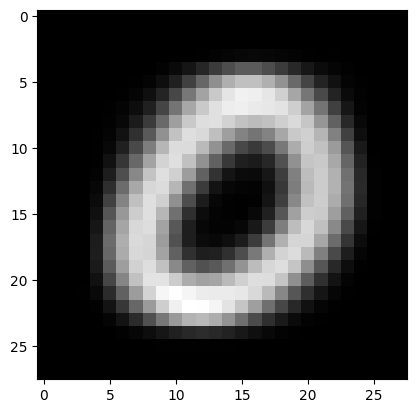

In [669]:
plt.imshow(mean_I[0], cmap = 'gray')


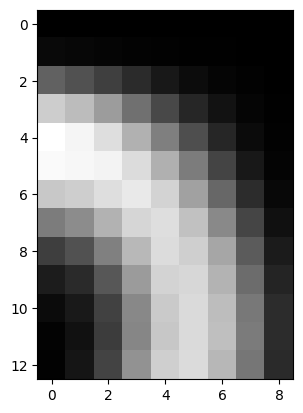

In [670]:
plt.imshow(mean_I[0][2:15, 16:25], cmap = 'gray')

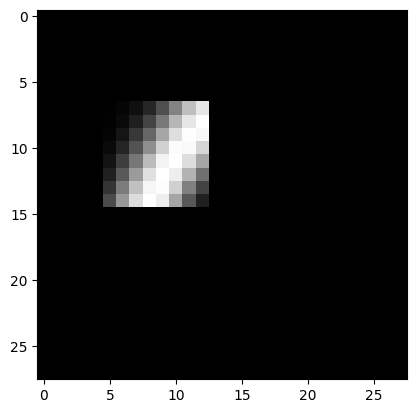

In [671]:
weights[0,0,7:15, 5:13] = mean_I[0][7:15, 5:13]
plt.imshow(weights[0,0, :, :], cmap = 'gray')

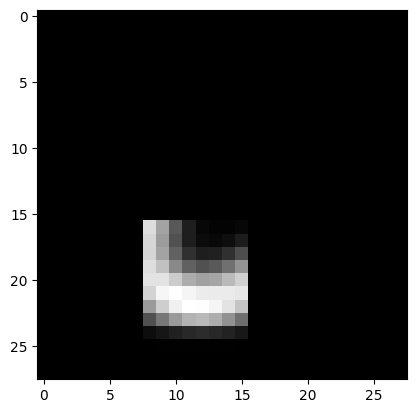

In [672]:
weights[0,1, 16:26, 8:16] = mean_I[0][16:26, 8:16]
plt.imshow(weights[0,1, :, :], cmap = 'gray')

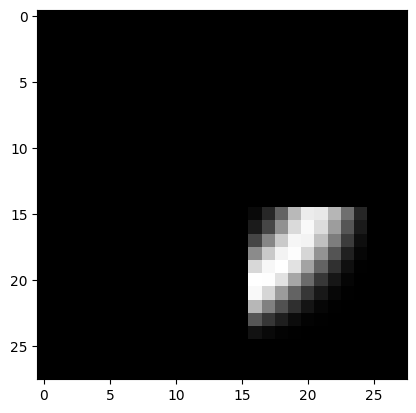

In [673]:
weights[0,2, 15:25, 16:25] = mean_I[0][15:25, 16:25]
plt.imshow(weights[0,2, :, :], cmap = 'gray')

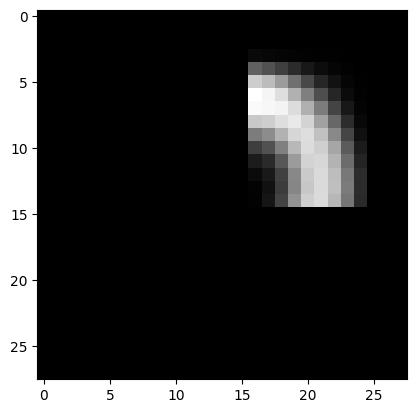

In [674]:
weights[0,3, 2:15, 16:25] = mean_I[0][2:15, 16:25]
plt.imshow(weights[0,3, :, :], cmap = 'gray')

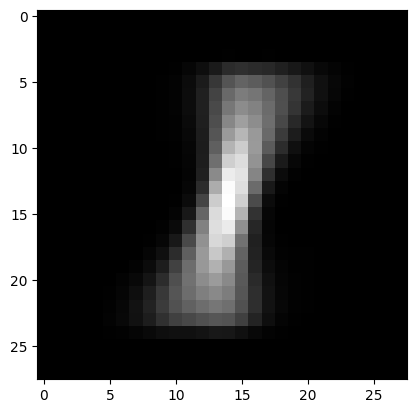

In [675]:
plt.imshow(mean_I[1], cmap = 'gray')

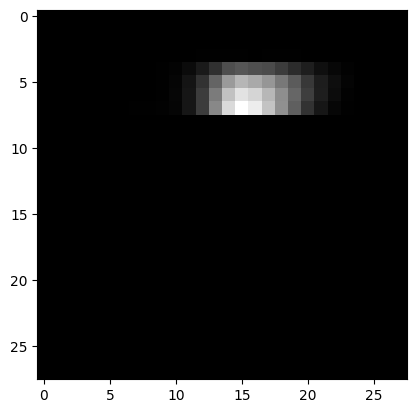

In [676]:
weights[1, 0, 0:8 , 5:25] = mean_I[1][0:8, 5:25]
plt.imshow(weights[1, 0, :, :], cmap='gray')

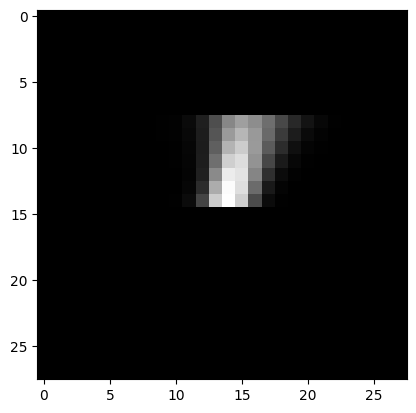

In [677]:
weights[1, 1, 8:15,  5:25] = mean_I[1][8:15,  5:25]
plt.imshow(weights[1, 1, :, :], cmap='gray')

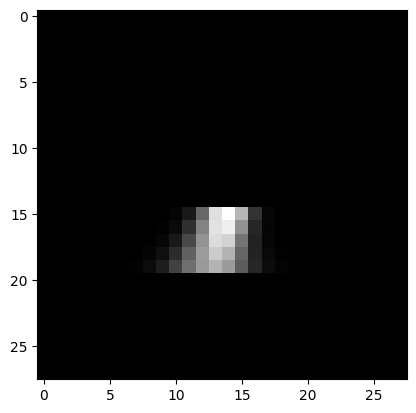

In [678]:
weights[1, 2, 15:20,  5:25] = mean_I[1][15:20, 5:25]
plt.imshow(weights[1, 2, :, :], cmap='gray')

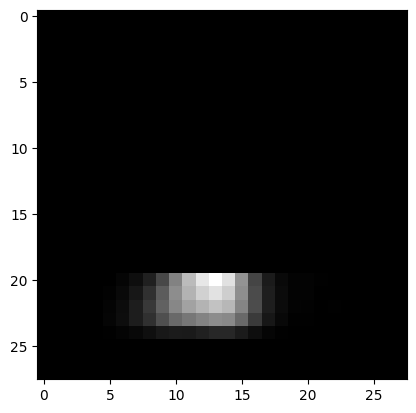

In [679]:
weights[1, 3, 20:28,   5:25] = mean_I[1][20:28, 5:25]
plt.imshow(weights[1, 3, :, :], cmap='gray')

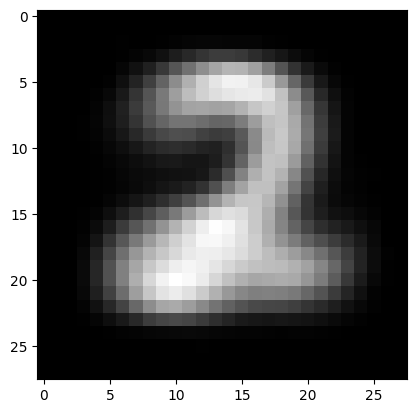

In [680]:
plt.imshow(mean_I[2], cmap = 'gray')

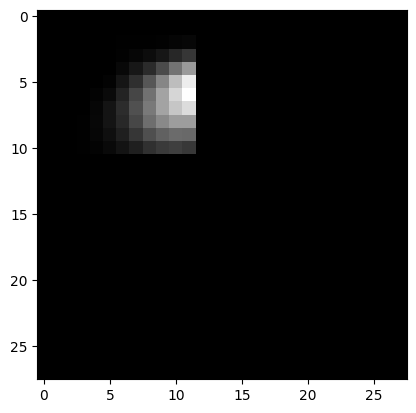

In [681]:
weights[2, 0, 0:11, 2:12] = mean_I[2][0:11, 2:12]
plt.imshow(weights[2, 0, :, :], cmap='gray')

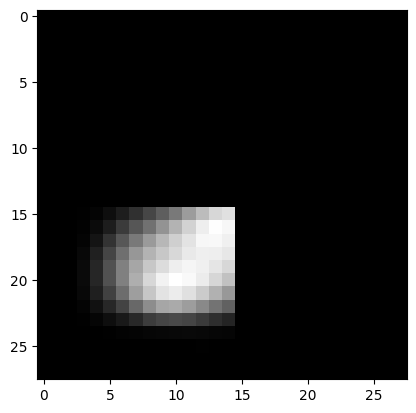

In [682]:
weights[2, 1, 15:28, 2:15] = mean_I[2][15:28, 2:15]
plt.imshow(weights[2, 1, :, :], cmap='gray')


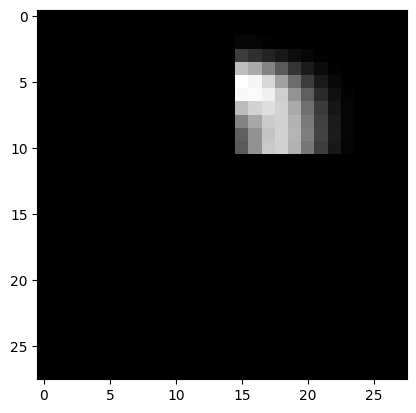

In [683]:
weights[2, 2, 0:11, 15:28] = mean_I[2][0:11, 15:28]
plt.imshow(weights[2, 2, :, :], cmap='gray')


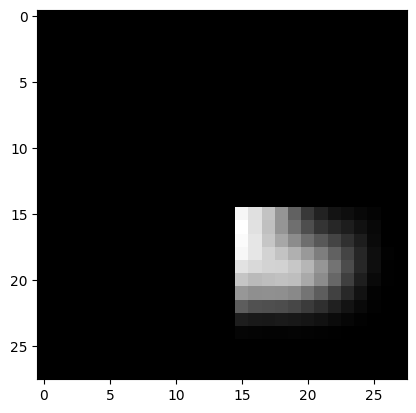

In [684]:
weights[2, 3, 15:28, 15:28] = mean_I[2][15:28, 15:28]
plt.imshow(weights[2, 3, :, :], cmap='gray')

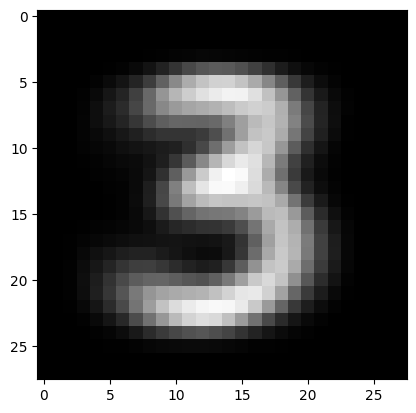

In [685]:
plt.imshow(mean_I[3], cmap = 'gray')

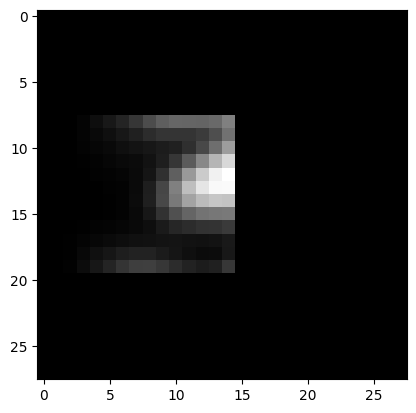

In [686]:
weights[3, 0, 8:20, 2:15] = mean_I[3][8:20, 2:15]
plt.imshow(weights[3, 0, :, :], cmap='gray')

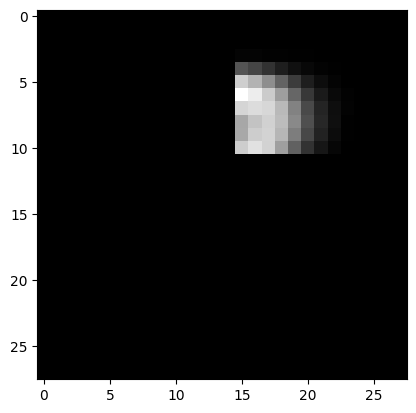

In [687]:
weights[3, 1, 0:11, 15:28] = mean_I[3][0:11, 15:28]
plt.imshow(weights[3, 1, :, :], cmap='gray')

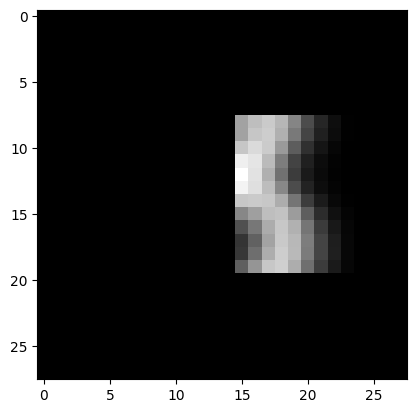

In [688]:
weights[3, 2, 8:20, 15:28] = mean_I[3][8:20, 15:28]
plt.imshow(weights[3, 2, :, :], cmap='gray')


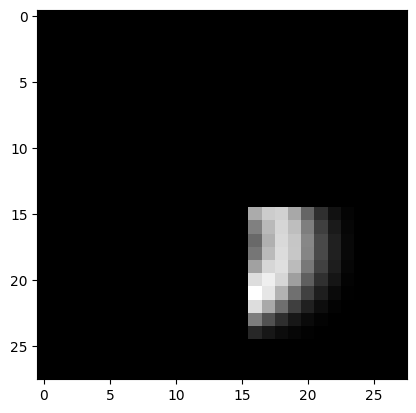

In [689]:
weights[3, 3, 15:25, 16:25] = mean_I[3][15:25, 16:25]
plt.imshow(weights[3, 3, :, :], cmap='gray')

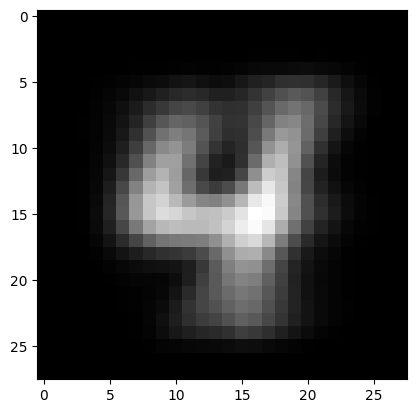

In [690]:
plt.imshow(mean_I[4], cmap = 'gray')

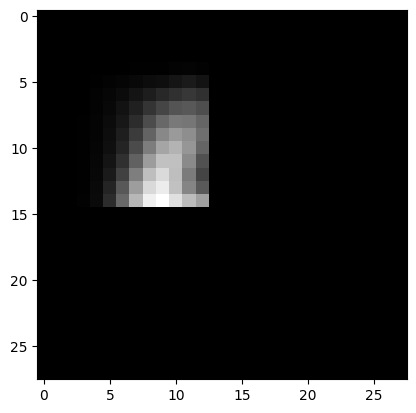

In [691]:
weights[4, 0, 0:15, 2:13] = mean_I[4][0:15, 2:13]
plt.imshow(weights[4, 0, :, :], cmap='gray')

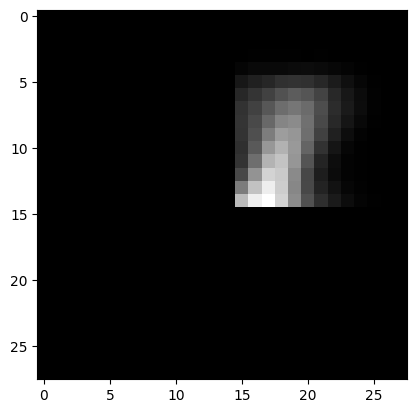

In [692]:
weights[4, 1, 0:15, 15:28] = mean_I[4][0:15, 15:28]
plt.imshow(weights[4, 1, :, :], cmap='gray')

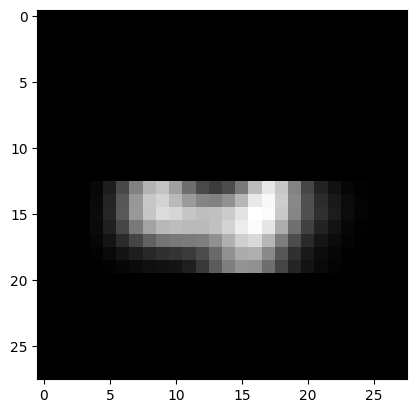

In [693]:
weights[4, 2, 13:20, 0:28] = mean_I[4][13:20, 0:28]
plt.imshow(weights[4, 2, :, :], cmap='gray')

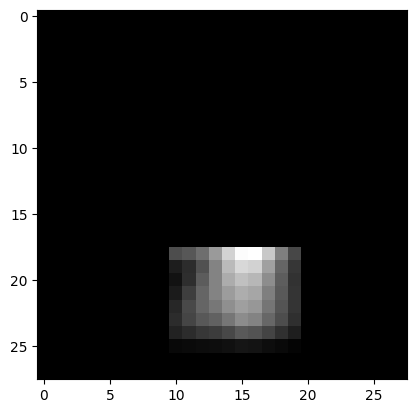

In [694]:
weights[4, 3, 18:28, 10:20] = mean_I[4][18:28, 10:20]
plt.imshow(weights[4, 3, :, :], cmap='gray')

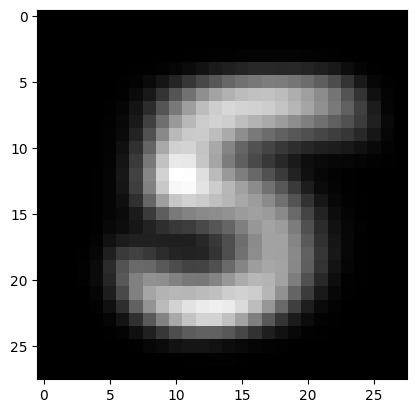

In [695]:
plt.imshow(mean_I[5], cmap = 'gray')

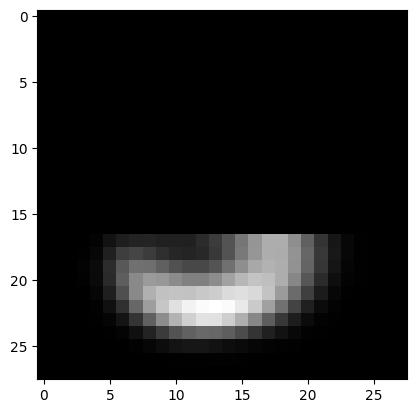

In [696]:
weights[5, 0, 17:28, 2:25] = mean_I[5][17:28, 2:25]
plt.imshow(weights[5, 0, :, :], cmap='gray')

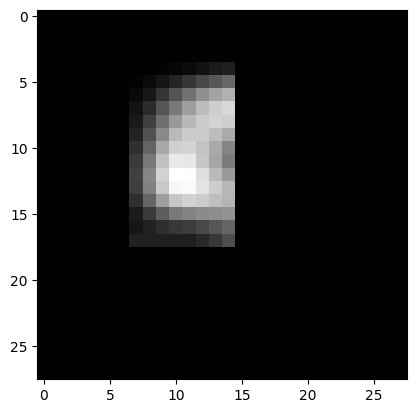

In [697]:
weights[5, 1, 0:18, 7:15] = mean_I[5][0:18, 7:15]
plt.imshow(weights[5, 1, :, :], cmap='gray')

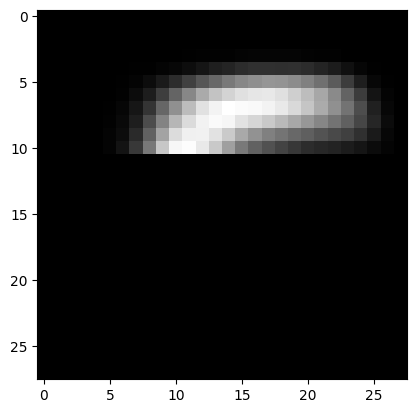

In [698]:
weights[5, 2, 0:11, 0:28] = mean_I[5][0:11, 0:28]
plt.imshow(weights[5, 2, :, :], cmap='gray')

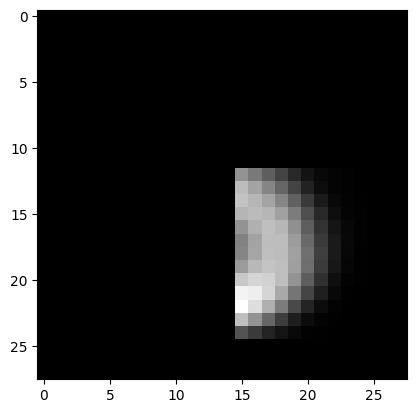

In [699]:
weights[5, 3, 12:25, 15:25] = mean_I[5][12:25, 15:25]
plt.imshow(weights[5, 3, :, :], cmap='gray')

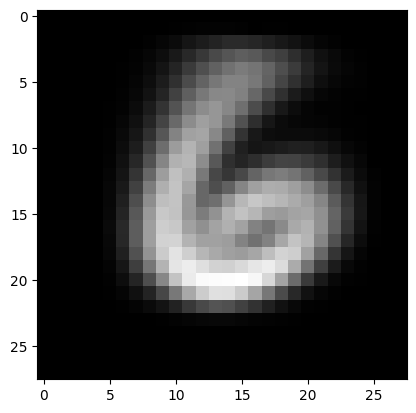

In [700]:
plt.imshow(mean_I[6], cmap = 'gray')

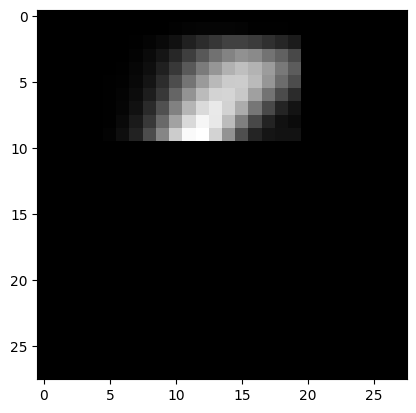

In [701]:
weights[6, 0, 0:10, 5:20] = mean_I[6][0:10, 5:20]
plt.imshow(weights[6, 0, :, :], cmap='gray')

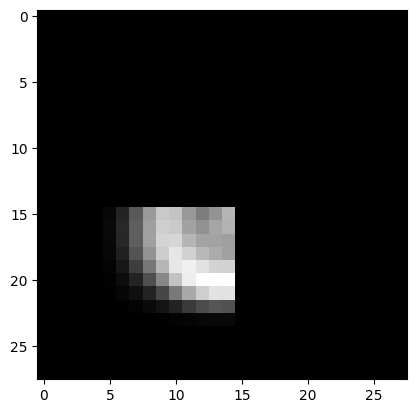

In [702]:
weights[6, 1, 15:25, 2:15] = mean_I[6][15:25, 2:15]
plt.imshow(weights[6, 1, :, :], cmap='gray')

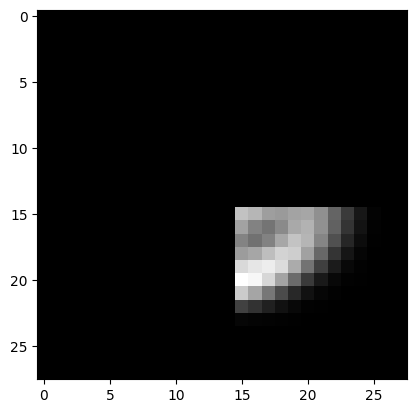

In [703]:
weights[6, 2, 15:25, 15:28] = mean_I[6][15:25, 15:28]
plt.imshow(weights[6, 2, :, :], cmap='gray')

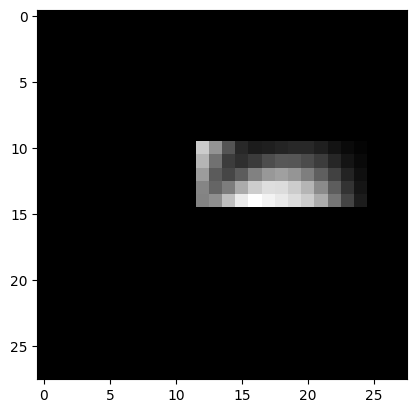

In [704]:
weights[6, 3, 10:15, 12:25] = mean_I[6][10:15, 12:25]
plt.imshow(weights[6, 3, :, :], cmap='gray')

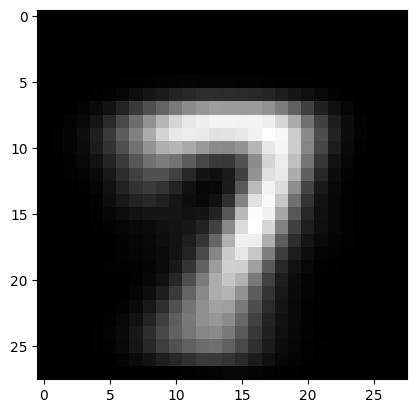

In [705]:
plt.imshow(mean_I[7], cmap = 'gray')

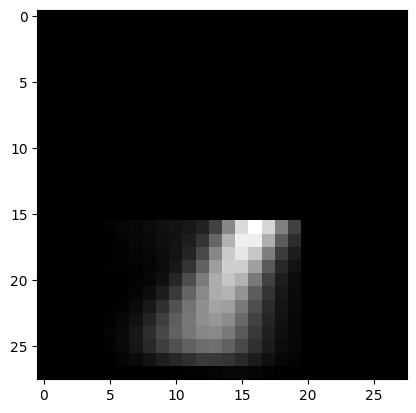

In [706]:
weights[7, 0, 16:28, 5:20] = mean_I[7][16:28, 5:20]
plt.imshow(weights[7, 0, :, :], cmap='gray')

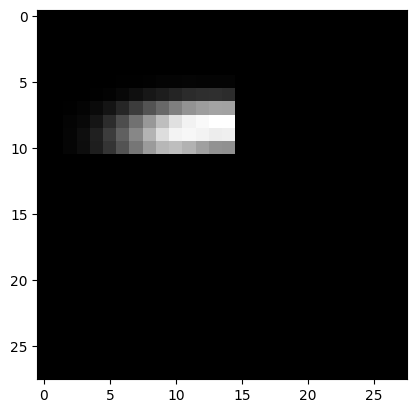

In [707]:
weights[7, 1, 5:11, 2:15] = mean_I[7][5:11, 2:15]
plt.imshow(weights[7, 1, :, :], cmap='gray')

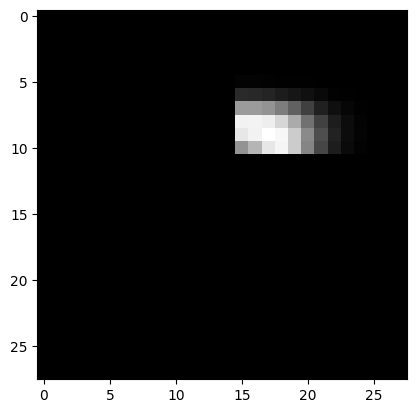

In [708]:
weights[7, 2, 5:11, 15:28] = mean_I[7][5:11, 15:28]
plt.imshow(weights[7, 2, :, :], cmap='gray')

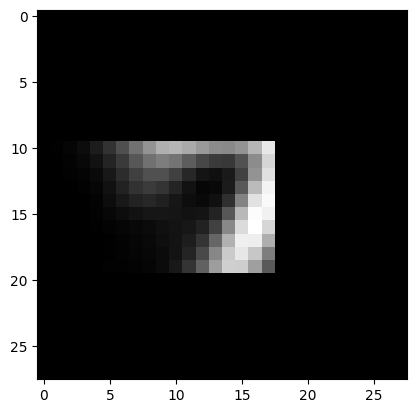

In [709]:
weights[7, 3, 10:20, 0:18] = mean_I[7][10:20, 0:18]
plt.imshow(weights[7, 3, :, :], cmap='gray')

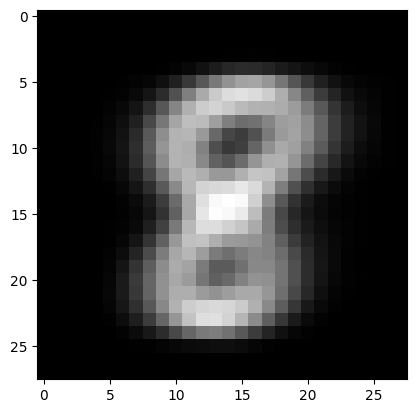

In [710]:
plt.imshow(mean_I[8], cmap = 'gray')

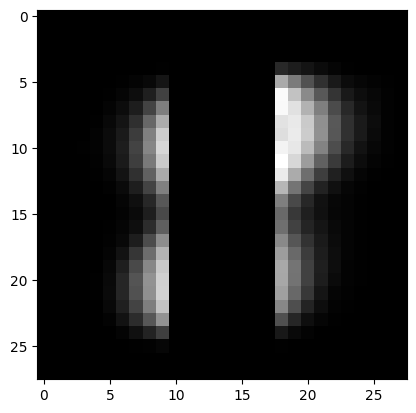

In [711]:
weights[8, 0, :, 0:10] = mean_I[8][:, 0:10]
weights[8, 0, :, 18:28] = mean_I[8][:, 18:28]

plt.imshow(weights[8, 0, :, :], cmap='gray')

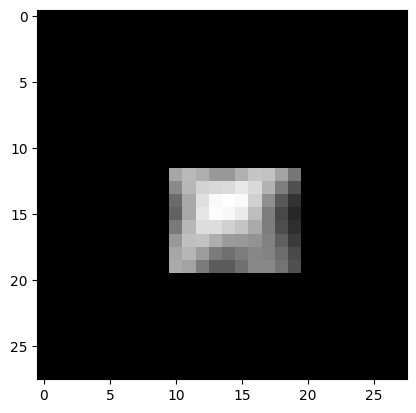

In [712]:
weights[8, 1, 12:20, 10:20] = mean_I[8][12:20, 10:20]
plt.imshow(weights[8, 1, :, :], cmap='gray')

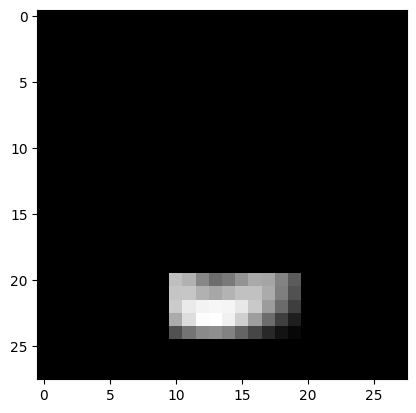

In [713]:
weights[8, 2, 20:25, 10:20] = mean_I[8][20:25, 10:20]
plt.imshow(weights[8, 2, :, :], cmap='gray')

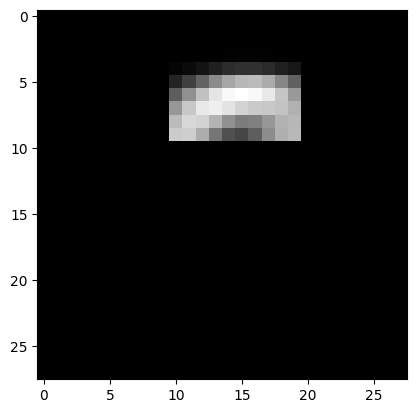

In [714]:
weights[8, 3, 0:10, 10:20] = mean_I[8][0:10, 10:20]
plt.imshow(weights[8, 3, :, :], cmap='gray')

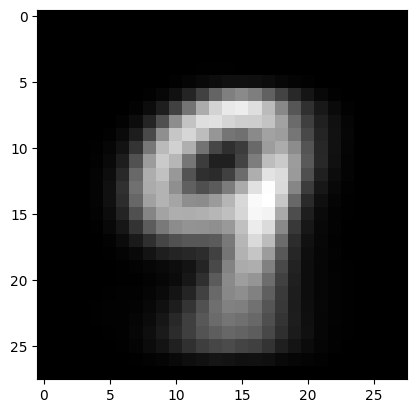

In [715]:
plt.imshow(mean_I[9], cmap = 'gray')

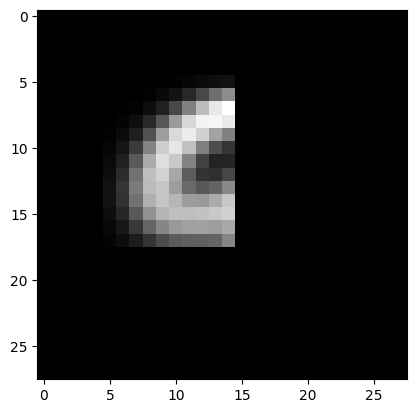

In [716]:
weights[9, 0, 0:18, 5:15] = mean_I[9][0:18, 5:15]
plt.imshow(weights[9, 0, :, :], cmap='gray')

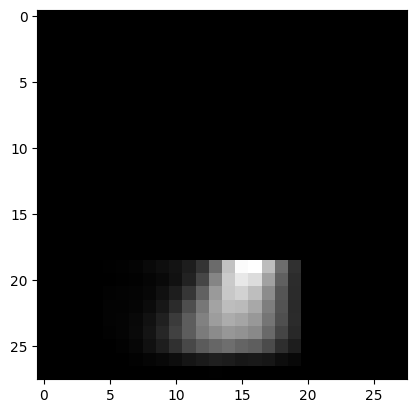

In [717]:
weights[9, 1, 19:28, 5:20] = mean_I[9][19:28, 5:20]
plt.imshow(weights[9, 1, :, :], cmap='gray')

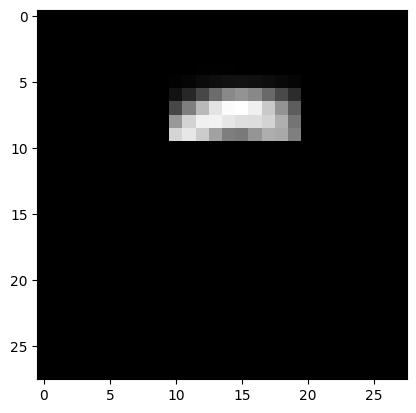

In [718]:
weights[9, 2, 0:10, 10:20] = mean_I[9][0:10, 10:20]
plt.imshow(weights[9, 2, :, :], cmap='gray')

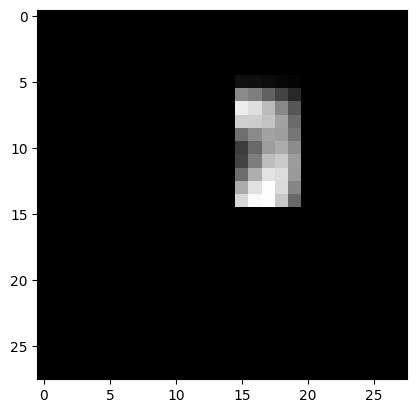

In [719]:
weights[9, 3, 5:15, 15:20] = mean_I[9][5:15, 15:20]
plt.imshow(weights[9, 3, :, :], cmap='gray')

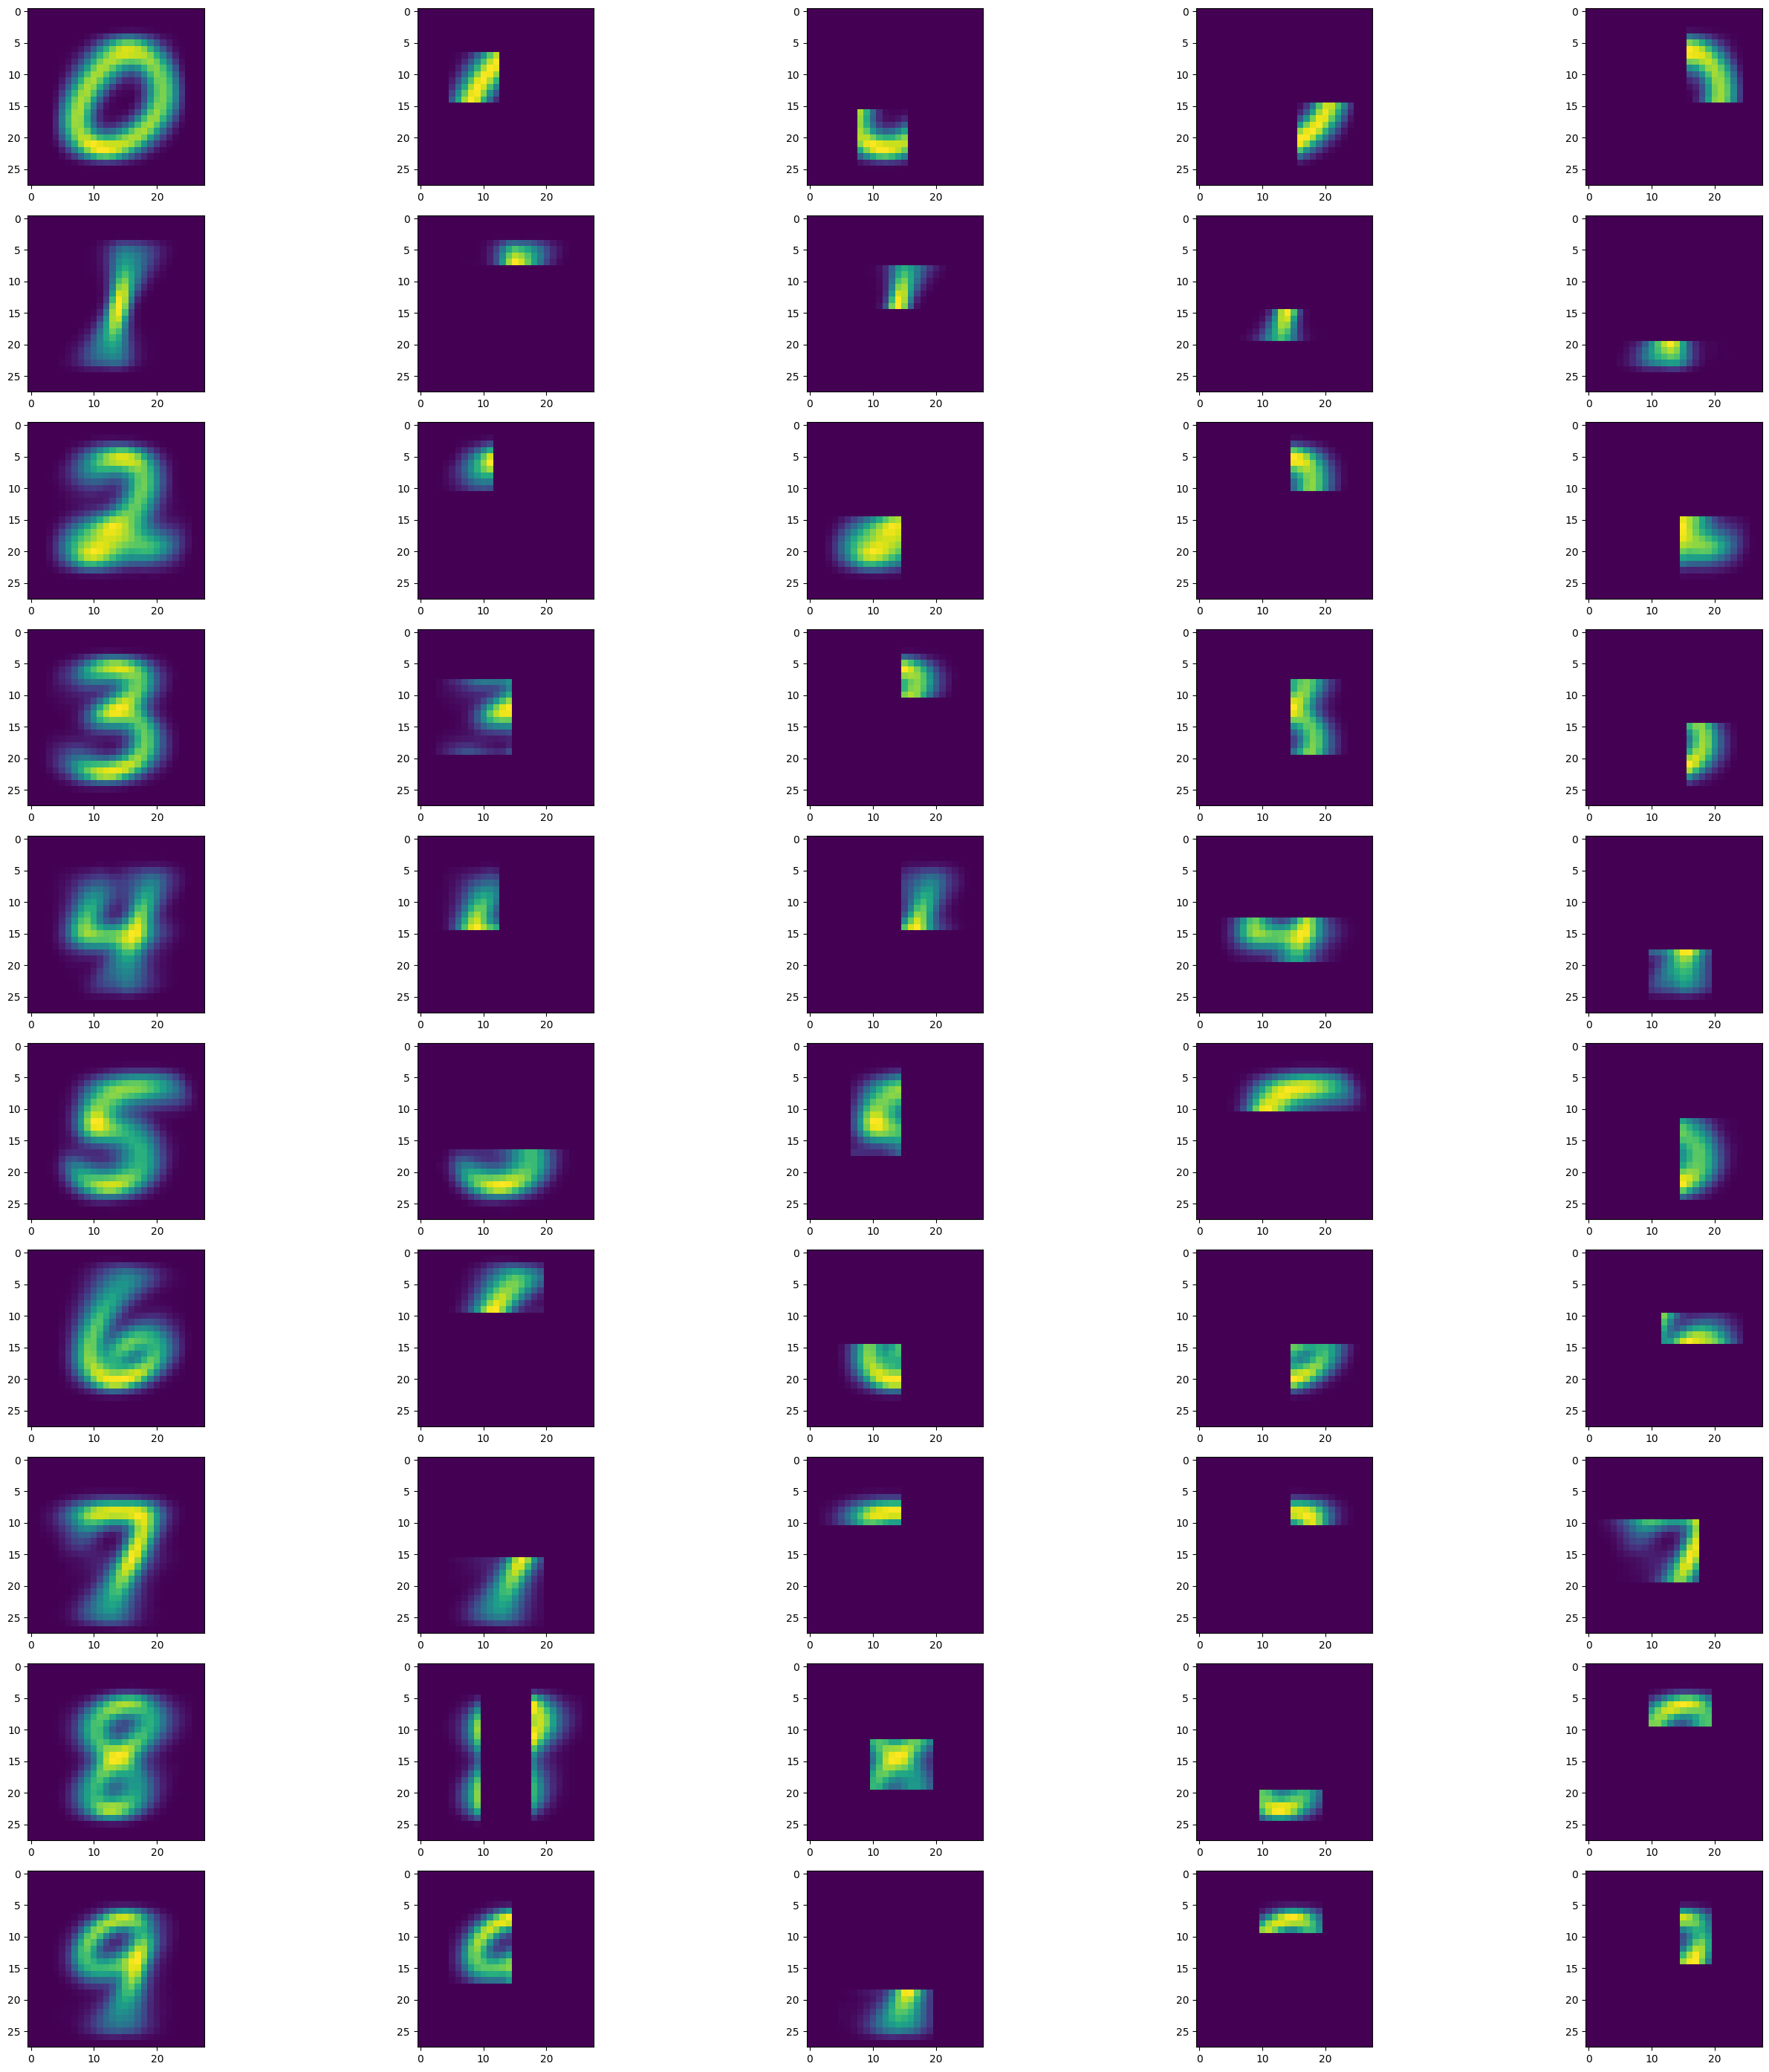

In [720]:
fig, axs = plt.subplots(nrows = 10, ncols = 5, figsize=(28 , 28))

for i in range(5):
  for j in range(10):
    if i == 0:
      axs[j,i].imshow(mean_I[j])
    else:
      axs[j,i].imshow(weights[j,i-1,:,:])

plt.tight_layout()
plt.show()

In [721]:
trn_I.shape

(48000, 28, 28)

In [722]:
tst_I.shape

(10000, 28, 28)

In [723]:
cv_I.shape

(12000, 28, 28)

In [724]:
trn_I = trn_I.reshape((trn_I.shape[0], 784))

In [725]:
tst_I = tst_I.reshape((tst_I.shape[0], 784))

In [726]:
cv_I = cv_I.reshape((cv_I.shape[0], 784))

In [727]:
weights.shape

(10, 4, 28, 28)

In [728]:
weights = weights.reshape((10, 4, 784))

In [729]:
weights.shape

(10, 4, 784)

In [730]:
weights = weights.reshape((40, 784))

In [731]:
weights.shape

(40, 784)

In [732]:
trn_input = np.matmul(trn_I, weights.T)

In [733]:
trn_input.shape

(48000, 40)

In [734]:
trn_lbl.shape

(48000,)

In [735]:
cv_input = np.matmul(cv_I, weights.T)

In [736]:
cv_input.shape

(12000, 40)

In [737]:
custom_model = keras.Sequential([
    keras.layers.Dense(40, activation = 'relu', input_shape=(40,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')

])

In [738]:
custom_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [739]:
custom_model.fit(trn_input, trn_lbl, epochs=10, validation_data=(cv_input, cv_lbl))

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0623 - accuracy: 0.6461 - val_loss: 70.1924 - val_accuracy: 0.8367
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4748 - accuracy: 0.8563 - val_loss: 64.5029 - val_accuracy: 0.8585
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8757 - val_loss: 55.2459 - val_accuracy: 0.8857
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3553 - accuracy: 0.8930 - val_loss: 52.0605 - val_accuracy: 0.8839
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3221 - accuracy: 0.9030 - val_loss: 46.4587 - val_accuracy: 0.9021
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.9099 - val_loss: 46.1347 - val_accuracy: 0.9009
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9170 - val_loss: 51.3762 - val_ac

In [740]:
tst_input = np.matmul(tst_I, weights.T)

In [741]:
tst_input.shape

(10000, 40)

In [742]:
tst_lbl.shape

(10000, 1)

In [743]:
tst_lbl = tst_lbl.reshape(10000)

In [744]:
tst_lbl

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [745]:
test_loss, test_acc = custom_model.evaluate(tst_input,  tst_lbl)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9286
Test accuracy: 0.928600013256073


In [746]:
wts0 = custom_model.layers[0].get_weights()[0]

In [747]:
wts0.shape

(40, 40)

In [748]:
wts1 = custom_model.layers[1].get_weights()[0]

In [749]:
wts1.shape

(40, 20)

In [750]:
# np.unique(wts1)

In [751]:
##########################################

In [752]:
min_val = np.min(wts1)
max_val = np.max(wts1)
wts1 = 2 * (wts1 - min_val) / (max_val - min_val) - 1

In [753]:
#########################################

In [754]:
# np.unique(wts1)

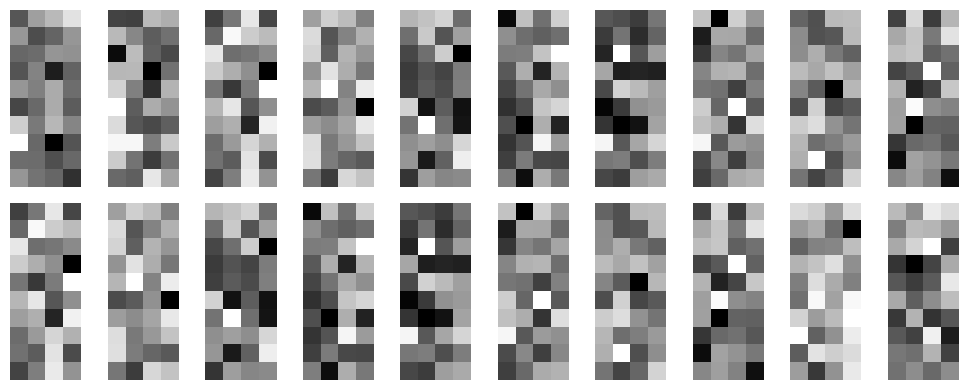

In [755]:
fig, axs = plt.subplots(2, 10, figsize=(10, 4))

for i in range(2):
    for j in range(10):
      node = wts1[:, i*2 + j]
      node = node.reshape((10, 4))
      axs[i, j].imshow(node, cmap='gray')
      axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [756]:
wts2 = custom_model.layers[2].get_weights()[0]

In [757]:
wts2.shape

(20, 10)

In [758]:
min_val = np.min(wts2)
max_val = np.max(wts2)
wts2 = 2 * (wts2 - min_val) / (max_val - min_val) - 1

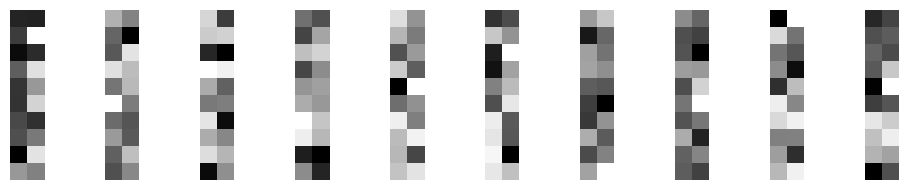

In [759]:
fig, axs = plt.subplots(1, 10, figsize=(10, 2))

# for i in range(2):
for j in range(10):
  node = wts2[:, j]
  node = node.reshape((10, 2))
  axs[j].imshow(node, cmap='gray')
  axs[j].axis('off')

plt.tight_layout()
plt.show()

In [760]:
# fig, axs = plt.subplots(2, 10, figsize=(28, 28))

# for i in range(2):
#     for j in range(10):
#       node = wts1[:, i*2 + j]
#       # print(node.shape)
#       temp = np.matmul(weights.T, node)

#       # print(temp.shape)
#       temp = temp.reshape((28,28))
#       axs[i, j].imshow(temp, cmap = 'gray')
#       axs[i, j].axis('off')

# plt.tight_layout()
# plt.show()

In [761]:
# fig, axs = plt.subplots(1, 10, figsize=(28, 28))

# for j in range(10):
#   node = wts1[:, j]
#   # print(node.shape)
#   temp = np.matmul(weights.T, node)
#   temp = np.maximum(temp, 0)
#   # print(temp.shape)
#   temp = temp.reshape((28,28))
#   axs[j].imshow(temp, cmap = 'gray')
#   # axs[j].imshow(tst_I[10].reshape((28,28)),  alpha = 0.2)

#   axs[j].axis('off')

# plt.tight_layout()
# plt.show()

In [762]:
idx = 90

In [763]:
tst_I[idx].shape

(784,)

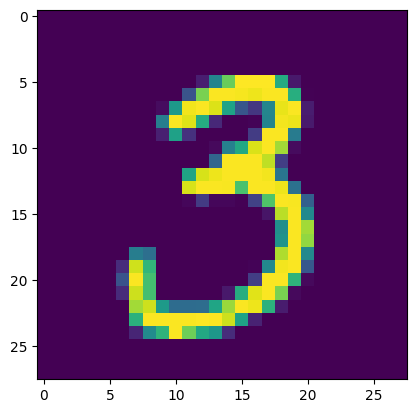

In [764]:
plt.imshow(tst_I[idx,].reshape((28,28)))

In [765]:
tst_input[idx].shape

(40,)

(-0.5, 0.5, 39.5, -0.5)

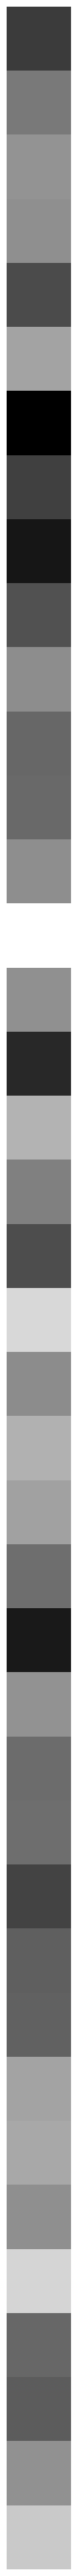

In [766]:
plt.figure(figsize = (400,50))
plt.imshow(tst_input[idx].reshape(40,1), cmap='gray' )
plt.axis('off')

In [767]:
weights = weights.reshape((10, 4, 28, 28))

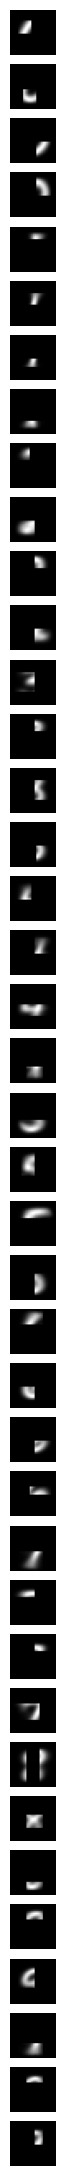

In [768]:
fig, axes = plt.subplots(nrows = 40, ncols=1, figsize=(28 , 28))

for j in range(0, 40, 4):
    for i in range(4):
        axes[j + i].imshow(weights[j // 4, i, :, :], cmap = 'gray')
        axes[j + i].axis('off')
plt.show()

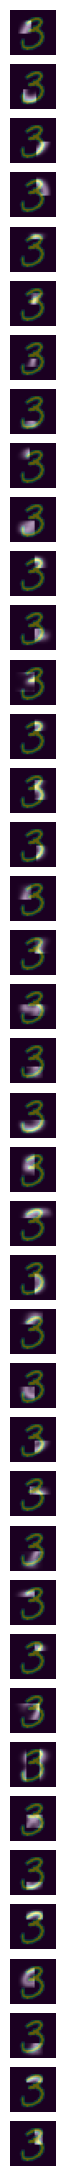

In [769]:
fig, axes = plt.subplots(nrows = 40, ncols=1, figsize=(28 , 28))

for j in range(0, 40, 4):
    for i in range(4):
        axes[j + i].imshow(weights[j // 4, i, :, :], cmap = 'gray')
        axes[j + i].imshow(tst_I[idx].reshape((28, 28)), alpha = 0.4)
        axes[j + i].axis('off')
plt.show()

In [770]:
temp = np.matmul(wts0.T , tst_input[idx])

In [771]:
temp = np.maximum(temp, 0)

In [772]:
temp.shape

(40,)

(-0.5, 0.5, 39.5, -0.5)

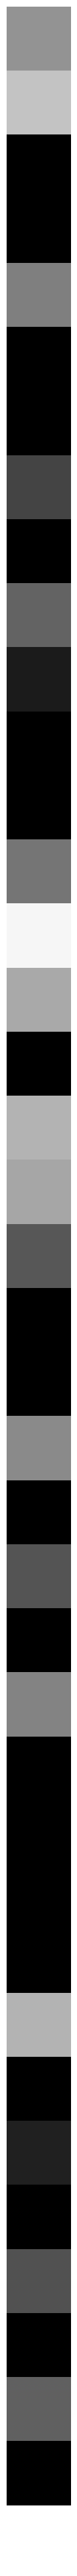

In [773]:
plt.figure(figsize = (400,50))
plt.imshow(temp.reshape(40,1), cmap='gray' )
plt.axis('off')

In [774]:
tst_input.shape

(10000, 40)

In [775]:
tst_input[idx].shape

(40,)

In [776]:
wts1.shape

(40, 20)

In [777]:
temp = np.matmul(wts1.T, temp)

In [778]:
temp = np.maximum(temp, 0)

In [779]:
temp.shape

(20,)

(-0.5, 0.5, 19.5, -0.5)

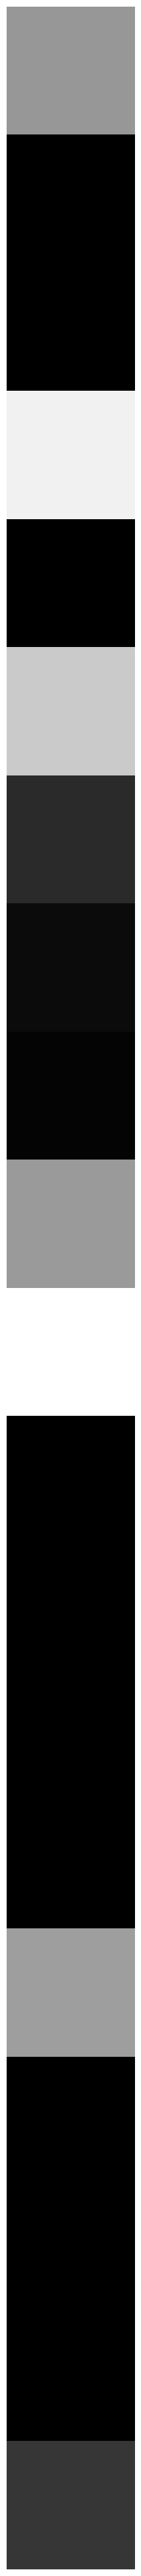

In [780]:
plt.figure(figsize = (400,50))
plt.imshow(np.reshape(temp,(20,1)), cmap='gray' )
plt.axis('off')

In [781]:
temp = np.reshape(temp,(20,1))

In [782]:
wts2.shape

(20, 10)

In [783]:
temp = np.matmul(wts2.T, temp )

In [784]:
temp = np.maximum(temp, 0)

In [785]:
temp.shape

(10, 1)

(-0.5, 0.5, 9.5, -0.5)

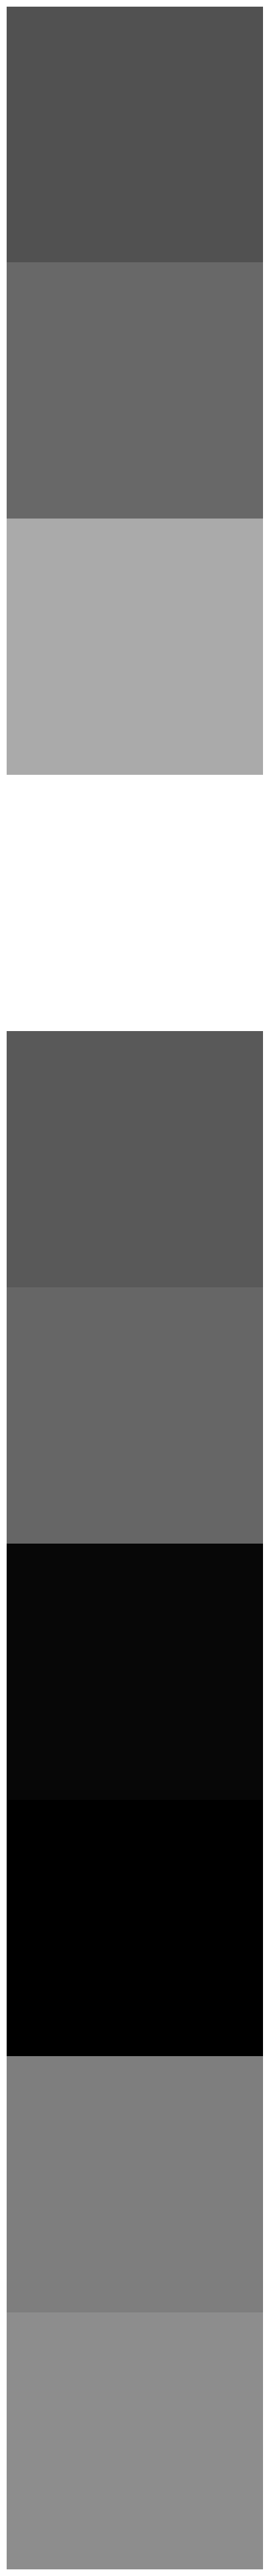

In [786]:
plt.figure(figsize = (400,50))
plt.imshow(temp, cmap='gray' )
plt.axis('off')

In [787]:
temp

array([[14.40289235],
       [16.7731877 ],
       [23.49045175],
       [32.20101993],
       [15.33522117],
       [16.5895966 ],
       [ 6.8508454 ],
       [ 6.1139114 ],
       [18.96233995],
       [20.49759465]])

In [788]:
tst_input[idx].shape

(40,)

In [789]:
out = custom_model.predict(tst_input)

313/313 [==============================] - 0s 1ms/step


In [793]:
out[idx].reshape(10,1)

array([[2.4068400e-05],
       [3.6637543e-05],
       [1.6498196e-04],
       [9.9876893e-01],
       [3.4361519e-06],
       [3.9575525e-04],
       [1.5344838e-08],
       [1.1850207e-07],
       [1.4992281e-04],
       [4.5605050e-04]], dtype=float32)